# TEAM D
## MICHALIS BALTSIOTIS 2578
## ZAZATIS NIKOLAOS-GERASIMOS 2723
## CHRISTOS KYRIAKIDIS 3029

# Reading datasets, EDA, cleaning data, and joining them in to one dataframe

In [67]:
import pandas as pd
import numpy as np

books_df = pd.read_csv("Books.csv")
ratings_df = pd.read_csv("Ratings.csv")
users_df = pd.read_csv("Users.csv")

C:\Users\zazat\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3185: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Books dataset

In [68]:
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [69]:
books_df = books_df.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis = 1)
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [70]:
books_df.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
dtype: int64

**As there are only 2 missing values in feature 'Publisher' and 1 in feature 'Book-Author', we can replace those values by searching them up on the internet**

In [71]:
books_df[books_df['Publisher'].isna()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In [72]:
books_df[books_df['Book-Author'].isna()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing


In [73]:
books_df[books_df['Book-Author'].isna()]['Book-Title']

187689    The Credit Suisse Guide to Managing Your Perso...
Name: Book-Title, dtype: object

In [74]:
books_df.loc[128890,'Publisher'] = 'Mundania Press LLC'
books_df.loc[129037,'Publisher'] = 'Bantam'
books_df.loc[187689, 'Book-Author'] = ' Larissa Anne Downes'

In [75]:
books_df.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

## Users dataset

In [76]:
users_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [77]:
users_df.isna().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

**We will impute the missing values in feature 'Age' with the median, which is more robust than mean when outliers are present**

In [78]:
from sklearn.impute import SimpleImputer
imp_median = SimpleImputer(strategy ='median')
age_array = users_df['Age'].values.reshape(-1,1)
imp_median.fit(age_array)
users_df['Age'] = imp_median.transform(age_array)
users_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",32.0
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",32.0
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",32.0


## Ratings dataset

In [79]:
ratings_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


**0 means that the user has bought/read the book but did not rate it. We will replace these values with 5.5 which is the average of 1 and 10**

In [80]:
ratings_df.isna().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [81]:
ratings_df['Book-Rating'].replace(0, 5.5, inplace = True)
ratings_df

,User-ID,ISBN,Book-Rating
0,276725,034545104X,5.5
1,276726,0155061224,5.0
2,276727,0446520802,5.5
3,276729,052165615X,3.0
4,276729,0521795028,6.0
...,...,...,...
1149775,276704,1563526298,9.0
1149776,276706,0679447156,5.5
1149777,276709,0515107662,10.0
1149778,276721,0590442449,10.0


In [82]:
ratings_df.isna().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

## Merging the datasets

In [83]:
users_ratings_df = pd.merge(ratings_df, users_df, how ='inner')
users_ratings_df.head()

,User-ID,ISBN,Book-Rating,Location,Age
0,276725,034545104X,5.5,"tyler, texas, usa",32.0
1,276726,0155061224,5.0,"seattle, washington, usa",32.0
2,276727,0446520802,5.5,"h, new south wales, australia",16.0
3,276729,052165615X,3.0,"rijeka, n/a, croatia",16.0
4,276729,0521795028,6.0,"rijeka, n/a, croatia",16.0


In [84]:
df = pd.merge(users_ratings_df, books_df, how ='inner')
df.head()

,User-ID,ISBN,Book-Rating,Location,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276725,034545104X,5.5,"tyler, texas, usa",32.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,2313,034545104X,5.0,"cincinnati, ohio, usa",23.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
2,6543,034545104X,5.5,"strafford, missouri, usa",34.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
3,8680,034545104X,5.0,"st. charles county, missouri, usa",2.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
4,10314,034545104X,9.0,"beaverton, oregon, usa",32.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books


## Age distribuition

<AxesSubplot:>

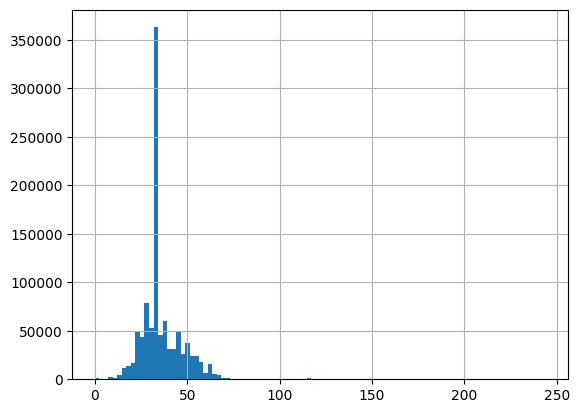

In [85]:
df.Age.hist(bins = 100)

- We can see that the age feature follows a Gaussian-like distribution with a spike in the middle. This occurs because we imputed the missing values. We can also see that some values are above 100, most likely they are outliers. To make the distribution more gaussian-like we will add some random number drawn from a normal distribution with mean of 0 and std of 4 to the rows that have Age == 32

In [86]:
np.random.seed(1)
mu = 0
sigma = 4

def norm_age(x):
    if x == 32:
        x += np.random.normal(mu, sigma, 1)[0]
  
    return x

df['Age'] = df['Age'].apply(lambda x:norm_age(x) )


<AxesSubplot:>

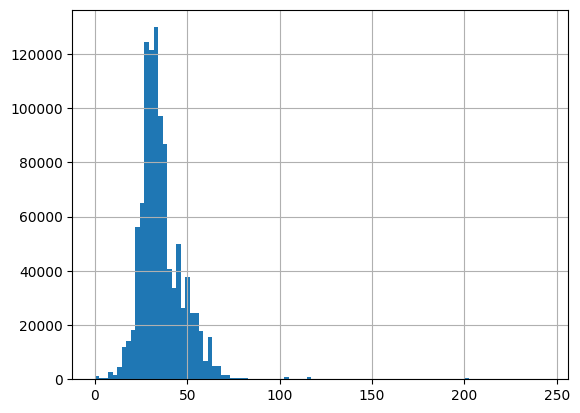

In [87]:
df.Age.hist(bins = 100)

In [88]:
print(f"Age feature: mean = {df.Age.mean()}, std = {df.Age.std()}")

Age feature: mean = 35.94588788694415, std = 12.47542500879395


<AxesSubplot:>

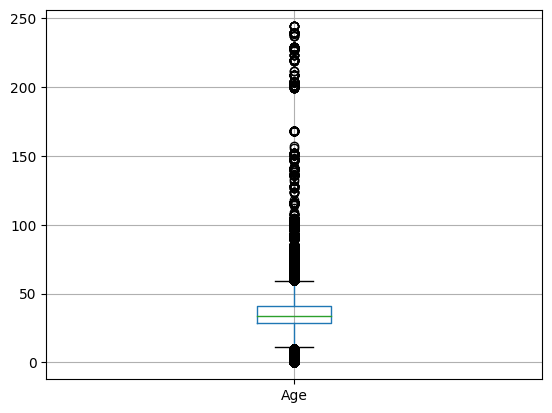

In [89]:
df.boxplot(['Age'])

In [90]:
len(df[(df['Age'] < 1)|(df['Age'] > 100)])

3471

In [91]:
len(df)

1031136

**We will drop all the rows with Age > 100, as their length is not comparable to the length of the whole dataset**


In [92]:
drop_age_index = df[(df['Age'] < 1)|(df['Age'] > 100)].index 
df.drop(drop_age_index, axis = 0, inplace = True)

<AxesSubplot:>

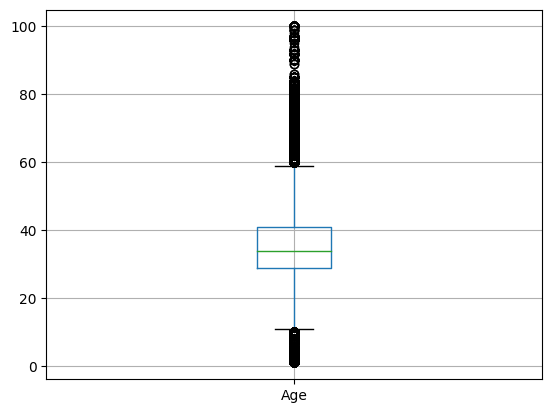

In [93]:
df.boxplot(['Age'])

## Year of publication Distribution

**We will filter the non-valid years in our dataset**

<AxesSubplot:>

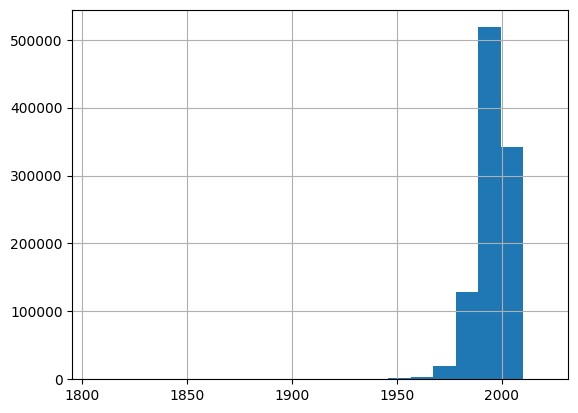

In [94]:
import numpy as np
val_years = [el for el in range(1500,2022)]
val_years_str = [str(el) for el in val_years]
years = []

for year in df['Year-Of-Publication']:
    if year not in val_years_str:
        if year not in val_years:
            years.append(np.nan)
        else:
            years.append(year)
    else: 
        years.append(int(year))
df['Year-Of-Publication'] = years
df['Year-Of-Publication'].hist(bins = 20)

We can see that the year-of-publication feature has a skewed distribution

In [95]:
print(f"Year-Of-Publication feature: mean = {df['Year-Of-Publication'].mean()}, std = {df['Year-Of-Publication'].std()}, mode = {df['Year-Of-Publication'].mode(dropna=True)[0]}")

Year-Of-Publication feature: mean = 1995.3010563553962, std = 7.307092312433206, mode = 2002.0


<AxesSubplot:>

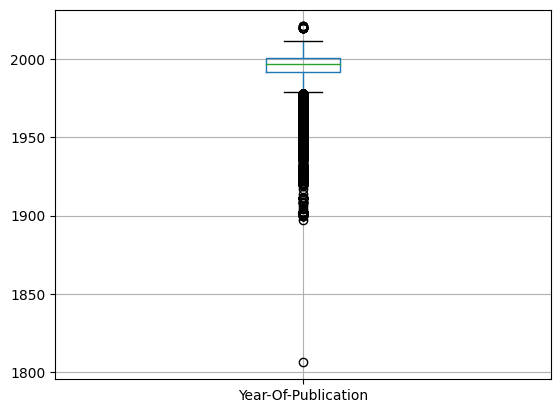

In [96]:
df.boxplot(['Year-Of-Publication'])

In [97]:
df['Year-Of-Publication'].dtype

dtype('float64')

**We will replace the missing values with the median and we will add a random number drawn from a normal distribution with mean  0 and std = 4**

<AxesSubplot:>

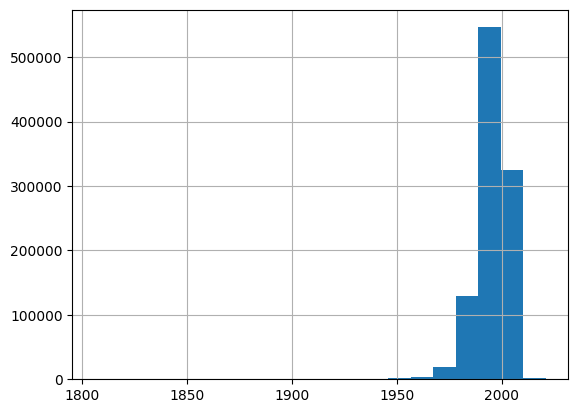

In [98]:
df['Year-Of-Publication'].fillna(2002, inplace = True)
df.astype({'Year-Of-Publication' :'int32'})

def norm_year(x):
  if x == 2002:
    x += np.random.normal(mu, sigma, 1)[0]
  
  return x
  
df['Year-Of-Publication'] = df['Year-Of-Publication'].apply(lambda x:norm_year(x) )

df['Year-Of-Publication'].hist(bins = 20)

## Most popular books/ authors and publishers

In [99]:
def kmost_popular(df, feature, k):
    temp = df.groupby([feature])['Book-Rating'].count().reset_index(name='Count').sort_values(['Count'], ascending=False)
    return temp[0:k]
        
        
kmost_popular(df, 'Book-Title',10)   

,Book-Title,Count
234608,Wild Animus,2494
196035,The Lovely Bones: A Novel,1291
183296,The Da Vinci Code,893
5296,A Painted House,834
198943,The Nanny Diaries: A Novel,827
27876,Bridget Jones's Diary,814
206199,The Secret Life of Bees,771
52898,Divine Secrets of the Ya-Ya Sisterhood: A Novel,740
204085,The Red Tent (Bestselling Backlist),722
14369,Angels &amp; Demons,666


In [100]:
kmost_popular(df, 'Book-Author',10)

,Book-Author,Count
90666,Stephen King,10016
72917,Nora Roberts,8407
48691,John Grisham,5995
42733,James Patterson,5830
66035,Mary Higgins Clark,4759
21397,Dean R. Koontz,4304
95620,Tom Clancy,4021
19232,Danielle Steel,3716
91678,Sue Grafton,3450
43748,Janet Evanovich,3327


In [101]:
kmost_popular(df, 'Publisher',10)

,Publisher,Count
1387,Ballantine Books,34598
11687,Pocket,31900
1712,Berkley Publishing Group,28522
15832,Warner Books,25421
6546,Harlequin,25008
1417,Bantam Books,23518
1413,Bantam,19943
13569,Signet Book,19084
1245,Avon,17306
11318,Penguin Books,16982


## Does the age affect the choice of a book?

In [102]:
df_age_below_18 = df[df['Age'] <= 18]
kmost_popular(df_age_below_18, 'Book-Title',10)

,Book-Title,Count
19349,Wild Animus,157
6451,Harry Potter and the Chamber of Secrets (Book 2),46
18141,To Kill a Mockingbird,45
6461,Harry Potter and the Sorcerer's Stone (Harry P...,43
6454,Harry Potter and the Goblet of Fire (Book 4),40
6457,Harry Potter and the Prisoner of Azkaban (Book 3),37
16099,The Lovely Bones: A Novel,37
6455,Harry Potter and the Order of the Phoenix (Boo...,35
1076,And Then There Were None : A Novel,35
15682,The Hobbit : The Enchanting Prelude to The Lor...,33


In [103]:
kmost_popular(df_age_below_18, 'Book-Author',10)

,Book-Author,Count
7694,R. L. Stine,395
8816,Stephen King,377
469,Ann M. Martin,358
7124,Nora Roberts,269
3870,J. K. Rowling,259
3001,Francine Pascal,164
7883,Rich Shapero,157
9429,V.C. Andrews,146
8001,Roald Dahl,138
5129,K. A. Applegate,132


In [104]:
kmost_popular(df_age_below_18, 'Publisher',10)

,Publisher,Count
1971,Scholastic,1935
1739,Pocket,879
201,Ballantine Books,725
992,HarperTrophy,621
274,Berkley Publishing Group,573
205,Bantam Books,570
2385,Warner Books,504
2041,Signet Book,466
2059,Simon Pulse,458
204,Bantam,458


In [105]:
df_age_above_18 = df[df['Age'] > 18]
df_age_between_18_50 = df_age_above_18[df_age_above_18['Age'] <= 50]
kmost_popular(df_age_between_18_50, 'Book-Title',10)

,Book-Title,Count
211724,Wild Animus,2060
177007,The Lovely Bones: A Novel,1142
179631,The Nanny Diaries: A Novel,771
25088,Bridget Jones's Diary,749
165551,The Da Vinci Code,748
4736,A Painted House,720
186184,The Secret Life of Bees,672
47804,Divine Secrets of the Ya-Ya Sisterhood: A Novel,669
184253,The Red Tent (Bestselling Backlist),649
146695,Snow Falling on Cedars,591


In [106]:
kmost_popular(df_age_between_18_50, 'Book-Author',10)

,Book-Author,Count
82794,Stephen King,8876
66622,Nora Roberts,7053
44406,John Grisham,5172
38945,James Patterson,4921
60312,Mary Higgins Clark,3956
19542,Dean R. Koontz,3723
87321,Tom Clancy,3380
17554,Danielle Steel,3082
83722,Sue Grafton,2951
39889,Janet Evanovich,2852


In [107]:
kmost_popular(df_age_between_18_50, 'Publisher',10)

,Publisher,Count
1276,Ballantine Books,29703
10735,Pocket,27473
1573,Berkley Publishing Group,24106
14582,Warner Books,21584
5994,Harlequin,21567
1304,Bantam Books,19934
1300,Bantam,17219
12486,Signet Book,16537
10391,Penguin Books,15246
1151,Avon,14750


In [108]:
df_age_above_50 = df[df['Age'] > 50]
kmost_popular(df_age_above_50, 'Book-Title',10)

,Book-Title,Count
61582,Wild Animus,277
47218,The Da Vinci Code,130
51072,The Lovely Bones: A Novel,112
1526,A Painted House,107
4048,Angels &amp; Demons,91
54803,The Summons,85
53970,The Secret Life of Bees,85
50314,The King of Torts,82
53695,The Runaway Jury,80
45260,The Beach House,74


In [109]:
kmost_popular(df_age_above_50, 'Book-Author',10)

,Book-Author,Count
21882,Nora Roberts,1085
12651,James Patterson,778
27264,Stephen King,763
14503,John Grisham,715
19819,Mary Higgins Clark,697
28764,Tom Clancy,545
5763,Danielle Steel,539
6420,Dean R. Koontz,490
27559,Sue Grafton,457
12984,Janet Evanovich,421


In [110]:
kmost_popular(df_age_above_50, 'Publisher',10)

,Publisher,Count
477,Ballantine Books,4170
614,Berkley Publishing Group,3843
4048,Pocket,3548
5554,Warner Books,3333
2247,Harlequin,3099
486,Bantam Books,3014
485,Bantam,2266
423,Avon,2148
4707,Signet Book,2081
1790,Fawcett Books,2045


**We can see that some popular books over the whole dataset can be popular for different ages, but the age feature does play a role in seleceting/reviewing a book**

# Baseline: Random Rating

**Before we can use ml models to make a good rating brediction, we need a baseline model where every other model must be performing at least a little better than the former**

In [111]:
import numpy as np
def evaluate_random_rating(test_df):
    N = len(test_df)
    mae_list, rmse_list = [], []
    for i in range(20):
        errors = []
        for index, row in test_df.iterrows():
            errors.append(np.random.uniform(1,10) - row['Book-Rating'])

        mae_list.append(sum(np.absolute(errors)) / N)
        rmse_list.append(np.sqrt(sum(np.power(errors,2)) / N))
    print("MAE: %.4f(+/-%.4f), RMSE: %.4f(+/-%.4f)" % (np.mean(mae_list), 1.96*np.std(mae_list)/np.sqrt(20),
                                                       np.mean(rmse_list), 1.96*np.std(rmse_list)/np.sqrt(20)))
    

# Collaborative Filtering

We will first study the most common approach to recommendation system, which is Collaborative Filtering. Mainly, we will apply item-based Neighborhood method, which aims to predict the rating for a (user,item) pair by finding similar books that the user has predicted and Latent Factors, which factorizes the matrix R matrix in to 2 new matrices.

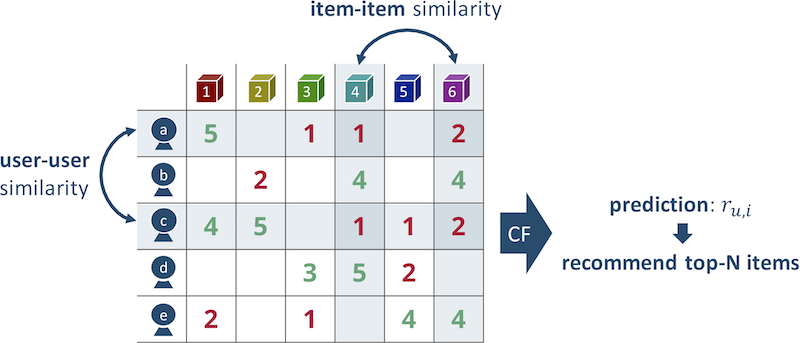

In [112]:
from IPython.display import Image
Image("https://takuti.github.io/Recommendation.jl/latest/assets/images/cf.png")

## Sampling

Our dataset is vast. Therefore we will choose a subset of the dataset. We will then split it to train and test datasets. We will also include a dataset with users with not many interactions to study the cold start problem.

In [113]:
df.groupby(['ISBN'])['Book-Rating'].count().reset_index(name='Count').sort_values(['Count'], ascending=False)

,ISBN,Count
215653,0971880107,2494
38499,0316666343,1291
70701,0385504209,878
7329,0060928336,732
32310,0312195516,722
...,...,...
127647,059063724X,1
127651,0590640860,1
127652,0590641204,1
127654,0590642588,1


In [114]:
top_books_id = []
book_rated_count = df.groupby(['ISBN'])['Book-Rating'].count().reset_index(name='Count').sort_values(['Count'], ascending=False)
for i in book_rated_count.index:
    if (book_rated_count.loc[i, 'Count'] >= 50):
        top_books_id.append(book_rated_count.loc[i, 'ISBN'])
        
len(top_books_id)

2153

In [115]:
book_rated_count.index

Int64Index([215653,  38499,  70701,   7329,  32310,  87284,  21304, 144855,
             93729, 132969,
            ...
            127623, 127634, 127640, 127642, 127644, 127647, 127651, 127652,
            127654, 269733],
           dtype='int64', length=269734)

In [116]:
from itertools import chain
book_indexes = []
for book_id in top_books_id:
    book_indexes.append(df[df['ISBN'] == book_id].index.values)
    
book_indexes
flatten_book_indexes = list(chain.from_iterable(book_indexes))

In [117]:
df_sample = df.loc[flatten_book_indexes, :]

In [118]:
df_sample.groupby(['User-ID'])['Book-Rating'].count().reset_index(name='Count').sort_values(['Count'], ascending=False)

,User-ID,Count
1608,11676,1562
5478,35859,743
11761,76352,677
2344,16795,606
23727,153662,558
...,...,...
5513,36067,1
22113,143422,1
22112,143420,1
5514,36094,1


In [119]:
top_users_id = []
user_ratings_count = df_sample.groupby(['User-ID'])['Book-Rating'].count().reset_index(name='Count').sort_values(['Count'], ascending=False)
for i in user_ratings_count.index:
    if (user_ratings_count.loc[i, 'Count'] >= 4):
        top_users_id.append(user_ratings_count.loc[i, 'User-ID'])
        
len(top_users_id)

9476

In [120]:
indexes = []
for user_id in top_users_id:
    indexes.append(df_sample[df_sample['User-ID'] == user_id].index.values)

In [121]:
flatten_indexes = list(chain.from_iterable(indexes))

In [122]:
df_sample = df_sample.loc[flatten_indexes,:]

In [123]:
df_sample.groupby(['User-ID'])['Book-Rating'].count().reset_index(name='Count').sort_values(['Count'], ascending=False)

,User-ID,Count
325,11676,1562
1153,35859,743
2555,76352,677
477,16795,606
5237,153662,558
...,...,...
5272,154787,4
5276,154859,4
5279,154981,4
5283,155019,4


In [124]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df_sample, test_size = 0.1, random_state = 3, shuffle =True)
train_df

,User-ID,ISBN,Book-Rating,Location,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher
57673,269566,0449221504,5.5,"seattle, washington, usa",9.000000,K Is for Killer (Kinsey Millhone Mysteries (Pa...,Sue Grafton,1999.0,Fawcett Books
106862,87051,1558745157,9.0,"colorado springs, colorado, usa",31.000000,The Lost Boy: A Foster Child's Search for the ...,Dave Pelzer,1997.0,Health Communications
388770,53628,0440343194,5.5,"brest, bretagne, france",22.000000,Illusions,Richard Bach,1981.0,Bantam Doubleday Dell
18725,212719,0446605484,8.0,"new bern, ,",38.835041,Roses Are Red (Alex Cross Novels),James Patterson,2001.0,Warner Vision
298652,236757,067088300X,5.5,"mars, pennsylvania, usa",29.775233,The Girls' Guide to Hunting and Fishing,Melissa Bank,1999.0,Viking Books
...,...,...,...,...,...,...,...,...,...
178792,220586,0452282829,9.0,"richmond, british columbia, canada",30.283233,We Were the Mulvaneys,Joyce Carol Oates,1996.0,Plume
291785,3371,0553260111,5.5,"groveland, massachusetts, usa",25.000000,The Bourne Identity,Robert Ludlum,1984.0,Bantam Books
231367,140000,0345438329,8.0,"london, england, united kingdom",30.049893,Big Stone Gap: A Novel (Ballantine Reader's Ci...,Adriana Trigiani,2001.0,Ballantine Books
72620,146175,0786868716,5.5,"orlando, florida, usa",27.000000,The Five People You Meet in Heaven,Mitch Albom,2003.0,Hyperion


In [125]:
# if there is a user in test dataset but not on train

for user in test_df['User-ID'].unique():
    if user not in train_df['User-ID'].unique():
        print(f'Error: user {user} is not on train dataset!')
        break

In [126]:
cold_start_users = train_df.groupby(['User-ID'])['Book-Rating'].count().reset_index(name='Count').sort_values(['Count'], ascending=True)[0:500]['User-ID'].values
cold_start_users
cold_start_users_idx = []

for user in cold_start_users:
    if user in test_df['User-ID'].unique():
        for idx in test_df[test_df['User-ID']==user].index:
            cold_start_users_idx.append(idx)
            

cold_test_df = test_df.loc[cold_start_users_idx,:].copy()

## Constructing R matrix

In [127]:

df_book_features = train_df.pivot(
    index='ISBN',
    columns='User-ID',
    values='Book-Rating'
).fillna(0)
df_book_features

User-ID,44,99,114,165,243,244,254,256,383,388,...,278390,278418,278535,278545,278554,278582,278586,278633,278843,278854
ISBN,,,,,,,,,,,,,,,,,,,,,
000649840X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0007110928,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
002026478X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0020442203,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
002542730X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3257229534,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3404148665,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3423202327,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [128]:
def book_name(ISBN):
    return books_df[books_df["ISBN"] == ISBN]['Book-Title'].values[0]

def book_author(ISBN):
    return books_df[books_df["ISBN"] == ISBN]['Book-Author'].values[0]

def book_rating(ISBN, user):
    return df[(df["ISBN"] == ISBN)&(df["User-ID"] == user)]['Book-Rating'].values[0]

## Collaborative Filtering - Neighborhood Method

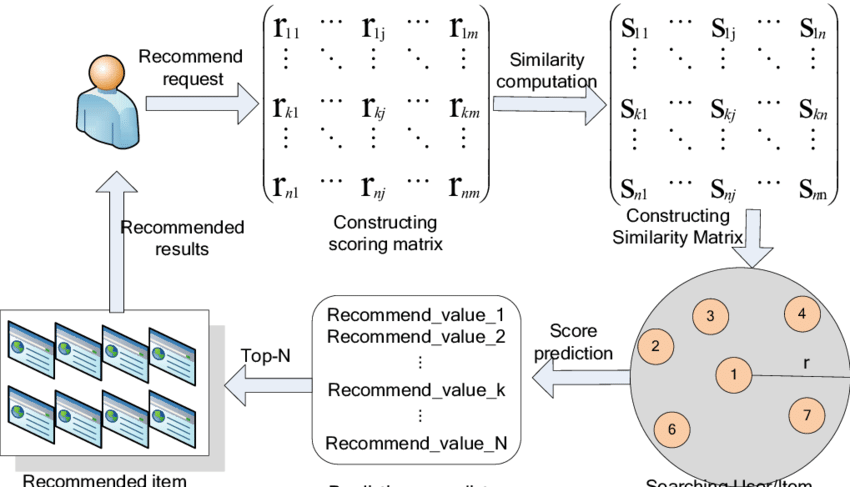

In [129]:
from IPython.display import Image
Image("General-recommendation-process-of-collaborative-filtering-algorithm.png")

In [130]:
def recommend_books(user, num_recommended_books):
    print('The list of the Books {} Has Reviewed \n'.format(user))
    count = 1
    for m in df_book_features[df_book_features[user] > 0][user].index.tolist():
        print('Book Title: {} - Author: {} - rating:{}'.format(book_name(m), book_author(m), book_rating(m, user)))
        count += 1
        if count == 10:
            break
        
    print('\n')
    recommended_books = []
    
    for m in df_book_features[df_book_features[user] == 0].index.tolist():
        index_df = df_book_features.index.tolist().index(m)
        predicted_rating = df1.iloc[index_df, df1.columns.tolist().index(user)]
        recommended_books.append((m, predicted_rating))
    
    sorted_rb = sorted(recommended_books, key=lambda x:x[1], reverse=True)
    print('The list of the Recommended Books \n')
    rank = 1
    for recommended_book in sorted_rb[:num_recommended_books]:
        print('{}: Book Title: {} - Author: {} - predicted rating:{}'.format(rank, book_name(recommended_book[0]), book_author(recommended_book[0]), recommended_book[1]))
        rank = rank + 1

In [131]:
from sklearn.neighbors import NearestNeighbors

# copy df
num_neighbors = 20
df1 = df_book_features.copy()
knn = NearestNeighbors(metric='cosine', algorithm='brute')
knn.fit(df_book_features.values)
distances, indices = knn.kneighbors(df_book_features.values, n_neighbors=num_neighbors)

def book_recommender_item_coll(user, num_neighbors, num_recommendation):
    user_index = df_book_features.columns.tolist().index(user)
    
    for m,t in list(enumerate(df_book_features.index)):
        if df_book_features.iloc[m, user_index] == 0:
            sim_books = indices[m].tolist()
            book_distances = distances[m].tolist()

            if m in sim_books:
                id_book = sim_books.index(m)
                sim_books.remove(m)
                book_distances.pop(id_book)

            else:
                sim_books = sim_books[:num_neighbors-1]
                book_distances = book_distances[:num_neighbors-1]

            # book_similarty = 1 - book_distance    
            book_similarity = [1-x for x in book_distances]
            book_similarity_copy = book_similarity.copy()
            nominator = 0

            # for each similar book
            for s in range(0, len(book_similarity)):

                # check if the rating of a similar book is zero
                if df_book_features.iloc[sim_books[s], user_index] == 0:
                    # if the rating is zero, ignore the rating and the similarity in calculating the predicted rating
                    if len(book_similarity_copy) == (num_neighbors - 1):
                          book_similarity_copy.pop(s)

                    else:
                        book_similarity_copy.pop(s-(len(book_similarity)-len(book_similarity_copy)))

                # if the rating is not zero, use the rating and similarity in the calculation
                else:
                    nominator = nominator + book_similarity[s]*df_book_features.iloc[sim_books[s],user_index]

            # check if the number of the ratings with non-zero is positive
            if len(book_similarity_copy) > 0:
                #check if the sum of the ratings of the similar book is positive.
                if sum(book_similarity_copy) > 0:
                    predicted_r = nominator/sum(book_similarity_copy)

                else:
                    predicted_r = 0
            else:
                predicted_r = 0

            df1.iloc[m,user_index] = predicted_r

    if num_recommendation > 0:        
        recommend_books(user, num_recommendation)
    
book_recommender_item_coll(76352, num_neighbors, 5)

The list of the Books 76352 Has Reviewed 

Book Title: Pagan Babies - Author: Elmore Leonard - rating:5.5
Book Title: The Divine Secrets of the Ya-Ya Sisterhood: A Novel - Author: Rebecca Wells - rating:5.5
Book Title: Everything Is Illuminated : A Novel - Author: Jonathan Safran Foer - rating:5.5
Book Title: The Bean Trees - Author: Barbara Kingsolver - rating:8.0
Book Title: Animal Dreams - Author: Barbara Kingsolver - rating:8.0
Book Title: Pigs in Heaven - Author: Barbara Kingsolver - rating:8.0
Book Title: Bel Canto: A Novel - Author: Ann Patchett - rating:6.0
Book Title: I Know This Much Is True - Author: Wally Lamb - rating:5.5
Book Title: The Professor and the Madman: A Tale of Murder, Insanity, and the Making of The Oxford English Dictionary - Author: Simon Winchester - rating:5.5


The list of the Recommended Books 

1: Book Title: Pink Slip - Author: RITA CIRESI - predicted rating:9.0
2: Book Title: A Swiftly Tilting Planet - Author: Madeleine L'Engle - predicted rating:9.0


In [132]:

def fill_rmatrix_item_coll(num_neighbors):
    for user in df_book_features.columns.tolist():
        book_recommender_item_coll(user, num_neighbors, 0)

fill_rmatrix_item_coll(num_neighbors)

In [133]:
def evaluate_item_coll(df1, test_df):
    errors = []
    n_0 = 0
    n0_errors = []
    N = len(test_df)
    for index, row in test_df.iterrows():
        user = row['User-ID']
        book = row['ISBN']
        # the rating for the (book, user) tuple was predicted
        if df1.loc[book, user]:
            errors.append(df1.loc[book, user] - row['Book-Rating'])
        # the algorithm couldn't predict the rating for the (book,user) tuple
        else:
            n0_errors.append(-row['Book-Rating']) 
            n_0 += 1

    mae = sum(np.absolute(errors)) / (N-n_0)
    rmse = np.sqrt(sum(np.power(errors,2)) / (N-n_0)) 
    total_mae = sum(np.absolute(errors+n0_errors)/N)
    total_rmse = np.sqrt(sum(np.power(errors+n0_errors,2)) / (N))
    print(f"MAE: {mae}, RMSE: {rmse}, Dataset Len: {N}, Couldn't predict: {n_0}")
    print(f"Total MAE: {total_mae}, Total RMSE: {total_rmse}")
    
evaluate_item_coll(df1, test_df)

MAE: 0.9102478126113334, RMSE: 1.5335794269285639, Dataset Len: 18869, Couldn't predict: 6313
Total MAE: 2.7351513877337115, Total RMSE: 3.9914037799902817


**Let's check the baseline**

In [134]:
evaluate_random_rating(test_df)


MAE: 2.5792(+/-0.0052), RMSE: 3.1157(+/-0.0062)


**We can see that item-based collaborative filtering performed better than random rating on the data that can predict**

In [135]:
evaluate_item_coll(df1, cold_test_df)

MAE: 1.1419359188442315, RMSE: 1.8265350204269648, Dataset Len: 683, Couldn't predict: 517
Total MAE: 5.341231863145194, Total RMSE: 6.089385937689168


**We can clearly see that this algorithm fails to predict for users with not many interactions**

In [136]:
evaluate_random_rating(cold_test_df)

MAE: 2.7949(+/-0.0216), RMSE: 3.4025(+/-0.0233)


# Collaborative filtering - latent factors/ matrix factorization

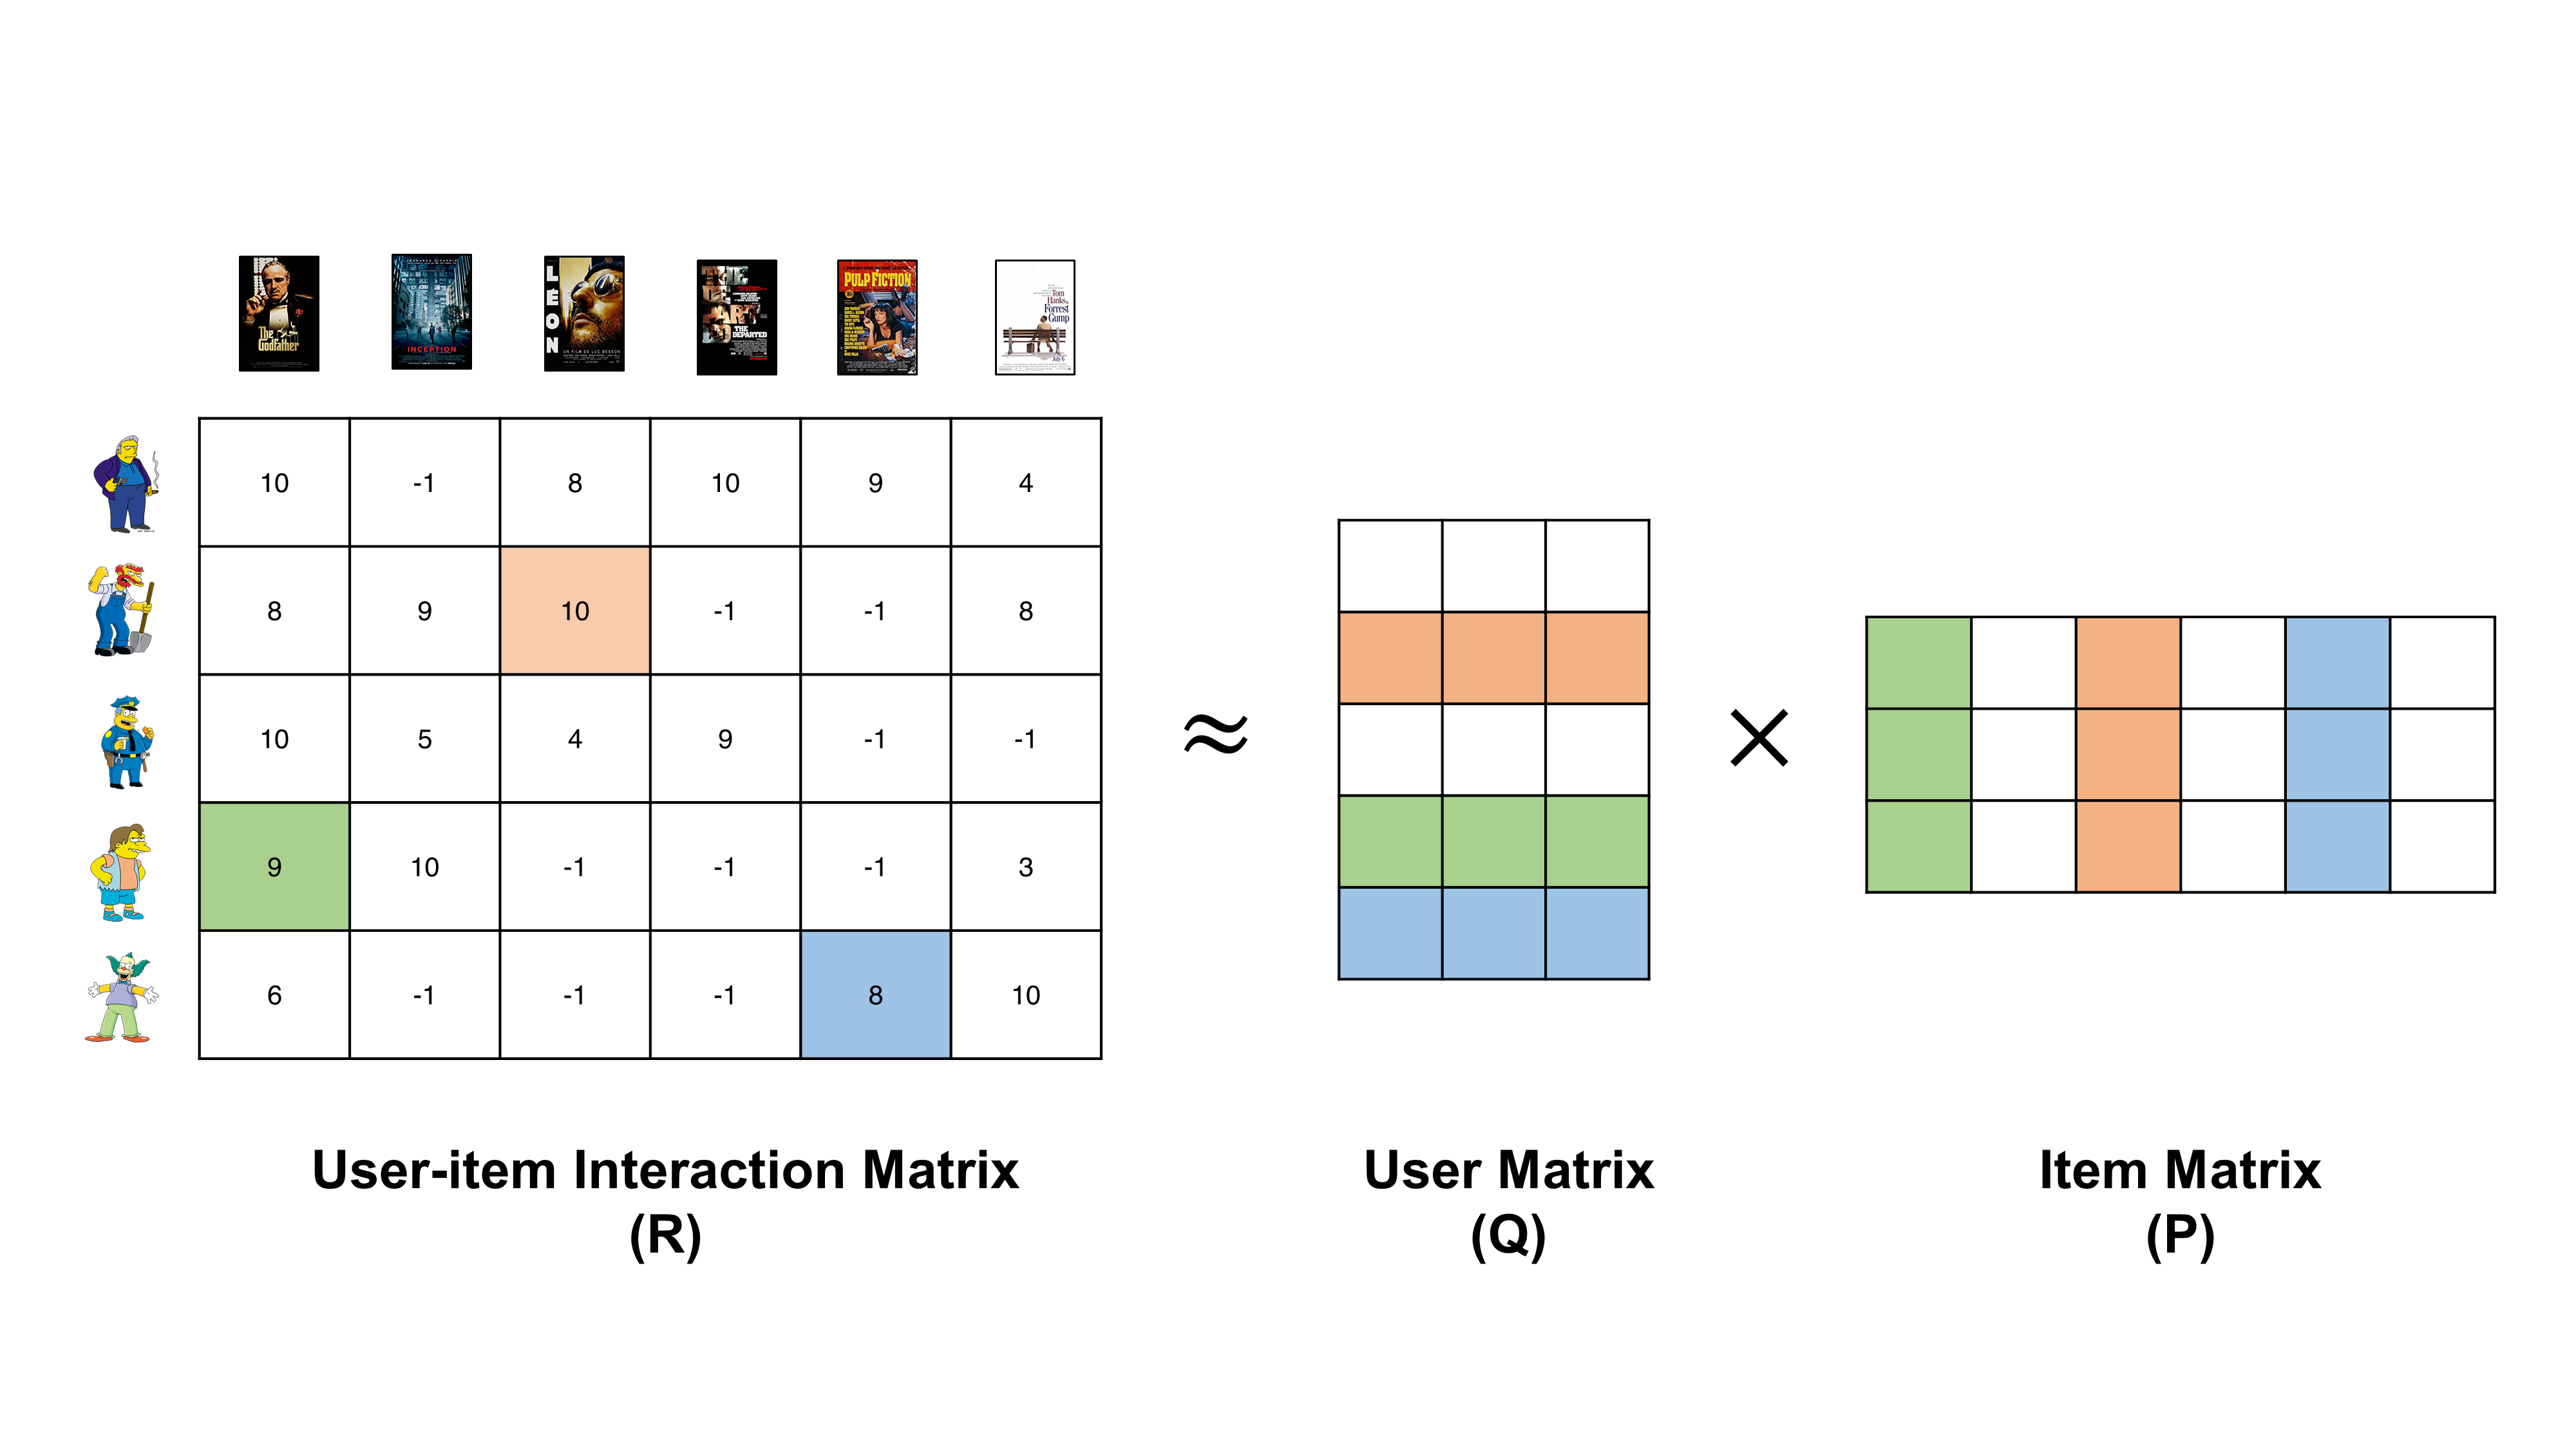

In [88]:
from IPython.display import Image
Image("https://buomsoo-kim.github.io/data/images/2020-09-25/1.png")

In [137]:
R = df_book_features.values
user_ratings_mean = np.mean(R, axis = 0)
R_demeaned = R - user_ratings_mean.reshape(1, -1)

In [138]:
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(R_demeaned, k = 50)

sigma = np.diag(sigma)

all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(1, -1)

preds_df = pd.DataFrame(all_user_predicted_ratings, columns = df_book_features.columns, index = df_book_features.index)
preds_df.head()

User-ID,44,99,114,165,243,244,254,256,383,388,...,278390,278418,278535,278545,278554,278582,278586,278633,278843,278854
ISBN,,,,,,,,,,,,,,,,,,,,,
000649840X,0.000529,0.015072,0.003882,0.037630,0.105210,0.012703,-0.171012,0.005792,-0.001346,0.125830,...,0.060950,0.031226,0.087554,-0.016008,0.018220,-0.050179,-0.000967,0.199120,-0.010292,-0.015724
0007110928,0.001441,-0.000684,-0.060402,0.031627,-0.062526,0.000658,-0.032533,0.003592,-0.019764,0.012640,...,-0.012803,0.216898,-0.005993,-0.003895,0.018037,-0.021370,-0.004547,0.071188,-0.004451,-0.016633
002026478X,0.031839,-0.052893,0.109447,0.000546,0.128839,-0.009736,0.211337,0.005712,0.023647,0.062205,...,0.266032,0.734188,-0.107947,0.033779,-0.007579,-0.177493,0.023877,0.192035,0.212951,0.021658
0020442203,-0.002069,0.033826,0.065700,0.035720,0.005520,0.042091,0.222025,-0.001034,-0.006892,0.082369,...,0.101209,0.798186,0.007970,0.034553,0.003207,0.006798,0.001004,-0.083064,0.086163,0.010728
002542730X,-0.020879,-0.011006,0.056821,0.045709,-0.047265,0.171622,1.081620,-0.169532,0.046186,0.015637,...,0.169699,2.050028,0.025264,-0.003145,-0.009394,-0.023477,0.063135,0.129696,0.257497,-0.021944


In [139]:
def recommend_books_mf(preds_df, user, original_df, num_recommendations=5):
    predictions = preds_df.loc[:,user].values.tolist()
    predictions_copy = predictions.copy()
    books = preds_df.index.tolist()
    books_copy = books.copy()
    already_rev_books = []
    
    for i,book in enumerate(books):
        if original_df.loc[book, user] != 0:
            already_rev_books.append(books_copy.pop(i - (len(books) - len(books_copy))))
            predictions_copy.pop(i - (len(predictions) - len(predictions_copy)))
            
    preds = pd.DataFrame([predictions_copy, books_copy])
    preds = preds.sort_values(by = 0, axis = 1, ascending = False)

    count = 0
    for book in already_rev_books:
        print('Book Title: {} - Author: {} - rating:{}'.format(book_name(book), book_author(book), book_rating(book, user)))
        count += 1
        if count == 10:
            break
        
    print('\n')
    
    print('The list of the Recommended Books \n')
    rank = 1
    for recommended_book in preds.iloc[1 , 0:num_recommendations].values:
        print('{}: Book Title: {} - Author: {}'.format(rank, book_name(recommended_book), book_author(recommended_book)))
        rank = rank + 1
        
    

In [140]:
recommend_books_mf(preds_df, 76352, df_book_features, num_recommendations = 5)

Book Title: Pagan Babies - Author: Elmore Leonard - rating:5.5
Book Title: The Divine Secrets of the Ya-Ya Sisterhood: A Novel - Author: Rebecca Wells - rating:5.5
Book Title: Everything Is Illuminated : A Novel - Author: Jonathan Safran Foer - rating:5.5
Book Title: The Bean Trees - Author: Barbara Kingsolver - rating:8.0
Book Title: Animal Dreams - Author: Barbara Kingsolver - rating:8.0
Book Title: Pigs in Heaven - Author: Barbara Kingsolver - rating:8.0
Book Title: Bel Canto: A Novel - Author: Ann Patchett - rating:6.0
Book Title: I Know This Much Is True - Author: Wally Lamb - rating:5.5
Book Title: The Professor and the Madman: A Tale of Murder, Insanity, and the Making of The Oxford English Dictionary - Author: Simon Winchester - rating:5.5
Book Title: A Thief of Time (Joe Leaphorn/Jim Chee Novels) - Author: Tony Hillerman - rating:5.5


The list of the Recommended Books 

1: Book Title: Patriot Games (Jack Ryan Novels) - Author: Tom Clancy
2: Book Title: Invasion - Author: Robi

In [141]:
def evaluate_mf_train(preds_df, original_df):
    errors = []
    N = 0
    for book in original_df.index.tolist():
        for user in original_df.columns.tolist():
            if original_df.loc[book, user] >= 1:
                errors.append(original_df.loc[book, user] - preds_df.loc[book, user])
                N += 1
                
    mae = sum(np.absolute(errors)) / N
    rmse = np.sqrt(sum(np.power(errors,2)) / N)
    print(f"MAE: {mae}, RMSE: {rmse}")
                
evaluate_mf_train(preds_df, df_book_features)

MAE: 4.94227085161925, RMSE: 5.35697038920629


In [142]:
def evaluate_mf_test(preds_df, test_df):
    errors = []
    N = len(test_df)
    for index, row in test_df.iterrows():
        user = row['User-ID']
        book = row['ISBN']
        #if preds_df.loc[book, user]:
        errors.append(preds_df.loc[book, user] - row['Book-Rating'] + 5.5)

    mae = sum(np.absolute(errors)) / N
    rmse = np.sqrt(sum(np.power(errors,2)) / N)
    print(f"MAE: {mae}, RMSE: {rmse}")
evaluate_mf_test(preds_df, test_df)

MAE: 1.2124292758645927, RMSE: 1.764292639599262


In [143]:
evaluate_mf_test(preds_df, cold_test_df)

MAE: 1.42671960972993, RMSE: 2.121637088805264


- Performance: latent factors collaborative filtering with svd is better than baseline but worse than item based collaborative filtering when the collaborative filtering doesn't fail
- Cold start: Latent factors perform much better than collaborative filtering
- Computational cost: latent factor is much faster than item based collaborative filtering when computing the whole R matrix


## Hyperparameter tuning

We will now explore the evaluation of MF with different k. For smaller k we need less memory to store the two matrices, as the dimensionality is reduced.

In [150]:
ks = [2,5,10,20,50,100,250,500,1000]

for k in ks:
    U, sigma, Vt = svds(R_demeaned, k = k)
    sigma = np.diag(sigma)
    all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(1, -1)
    preds_df = pd.DataFrame(all_user_predicted_ratings, columns = df_book_features.columns, index = df_book_features.index)
    print(f"K: {k} - Test evaluate")
    evaluate_mf_test(preds_df, test_df)
    print("Cold test evaluate")
    evaluate_mf_test(preds_df, cold_test_df)
    print("----------")

K: 2 - Test evaluate
MAE: 1.1597070956774018, RMSE: 1.7519325664350978
Cold test evaluate
MAE: 1.435636862694083, RMSE: 2.1572161862691175
----------
K: 5 - Test evaluate
MAE: 1.1922821646271446, RMSE: 1.7657937771901395
Cold test evaluate
MAE: 1.432845880421901, RMSE: 2.14625593590815
----------
K: 10 - Test evaluate
MAE: 1.1953270060040322, RMSE: 1.7600848612280808
Cold test evaluate
MAE: 1.4292398883915909, RMSE: 2.139482526703699
----------
K: 20 - Test evaluate
MAE: 1.211209562632508, RMSE: 1.771219670843666
Cold test evaluate
MAE: 1.43058555893542, RMSE: 2.1346541905848864
----------
K: 50 - Test evaluate
MAE: 1.2124292758645938, RMSE: 1.7642926395992622
Cold test evaluate
MAE: 1.426719609729929, RMSE: 2.1216370888052634
----------
K: 100 - Test evaluate
MAE: 1.197349586138884, RMSE: 1.7352428344440187
Cold test evaluate
MAE: 1.4229671793201302, RMSE: 2.1081621478973087
----------
K: 250 - Test evaluate
MAE: 1.1377637925521296, RMSE: 1.6955609082812995
Cold test evaluate
MAE: 1.4

**We can see that for k = 250 we get similar performance with k = 500, but with much less space.**

In [152]:
U, sigma, Vt = svds(R_demeaned, k = 250)
sigma = np.diag(sigma)
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(1, -1)
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = df_book_features.columns, index = df_book_features.index)

##  Hybrid model: Item based and Latent Factors Collaborative-filtering

To predict a book's rating, we will average the rating between Item based Collaborative filtering and Latent Factors Collaborative filtering. If Collaborative filtering fails to predict then we will use only the matrix from Latent Factors to predict

In [153]:
def evaluate_hybrid(nn_r, mf_r, test_df):
    errors = []
    N = len(test_df)
    for index, row in test_df.iterrows():
        user = row['User-ID']
        book = row['ISBN']
        if nn_r.loc[book, user]:
            errors.append((nn_r.loc[book, user] + mf_r.loc[book,user] + 5.5 - 2*row['Book-Rating'])/2 )
        else:
            errors.append((5.5 + mf_r.loc[book,user] - row['Book-Rating']) )

    mae = sum(np.absolute(errors)) / N
    rmse = np.sqrt(sum(np.power(errors,2)) / N)
    print(f"MAE: {mae}, RMSE: {rmse}")

evaluate_hybrid(df1, preds_df, test_df)

MAE: 1.0216831958112234, RMSE: 1.554401682840292


In [154]:
evaluate_hybrid(df1, preds_df, cold_test_df)

MAE: 1.374274362173026, RMSE: 2.0291437905660064


**We can observe that the performance is somewhat in the middle of both models. This may seem worse than item based collaborative-filtering but this model performs better in occurence of cold start problem**

In [155]:
def recommend_books_hybrid(nn_r, mf_r, user, original_df, num_recommendations=5):
    predictions = ((nn_r.loc[:,user].values + mf_r.loc[:,user].values + 5.5)/2).tolist()
    predictions_copy = predictions.copy()
    books = nn_r.index.tolist()
    books_copy = books.copy()
    already_rev_books = []
    
    for i,book in enumerate(books):
        if original_df.loc[book, user] != 0:
            already_rev_books.append(books_copy.pop(i - (len(books) - len(books_copy))))
            predictions_copy.pop(i - (len(predictions) - len(predictions_copy)))
            
    preds = pd.DataFrame([predictions_copy, books_copy])
    preds = preds.sort_values(by = 0, axis = 1, ascending = False)

    count = 0
    for book in already_rev_books:
        print('Book Title: {} - Author: {} - rating:{}'.format(book_name(book), book_author(book), book_rating(book, user)))
        count += 1
        if count == 10:
            break
        
    print('\n')
    
    print('The list of the Recommended Books \n')
    rank = 1
    for recommended_book in preds.iloc[1 , 0:num_recommendations].values:
        print('{}: Book Title: {} - Author: {}'.format(rank, book_name(recommended_book), book_author(recommended_book)))
        rank = rank + 1
        
recommend_books_hybrid(df1, preds_df, 76352, df_book_features, num_recommendations = 5)

Book Title: Pagan Babies - Author: Elmore Leonard - rating:5.5
Book Title: The Divine Secrets of the Ya-Ya Sisterhood: A Novel - Author: Rebecca Wells - rating:5.5
Book Title: Everything Is Illuminated : A Novel - Author: Jonathan Safran Foer - rating:5.5
Book Title: The Bean Trees - Author: Barbara Kingsolver - rating:8.0
Book Title: Animal Dreams - Author: Barbara Kingsolver - rating:8.0
Book Title: Pigs in Heaven - Author: Barbara Kingsolver - rating:8.0
Book Title: Bel Canto: A Novel - Author: Ann Patchett - rating:6.0
Book Title: I Know This Much Is True - Author: Wally Lamb - rating:5.5
Book Title: The Professor and the Madman: A Tale of Murder, Insanity, and the Making of The Oxford English Dictionary - Author: Simon Winchester - rating:5.5
Book Title: A Thief of Time (Joe Leaphorn/Jim Chee Novels) - Author: Tony Hillerman - rating:5.5


The list of the Recommended Books 

1: Book Title: Dune Messiah (Dune Chronicles, Book 2) - Author: Frank Herbert
2: Book Title: Chicken Soup f

# Recommendation System using Deep Learning

The next step is to make a Recommendation System using Deep Learning architecture. First we are going to use only the book-id and the user-id to predict the rating of a book and then we will add some other variables/features to see if our model's performance increased. To use the ISBN and User-ID features we need to encode them. Using ordinal encoding and feeding them to a MLP is not right. We could try and encode them using one-hot encoding, but because of the number of the unique books/users, our dataset will be large. Therefore, we will use an Embedding Layer, which is a layer that maps an id to a vector.

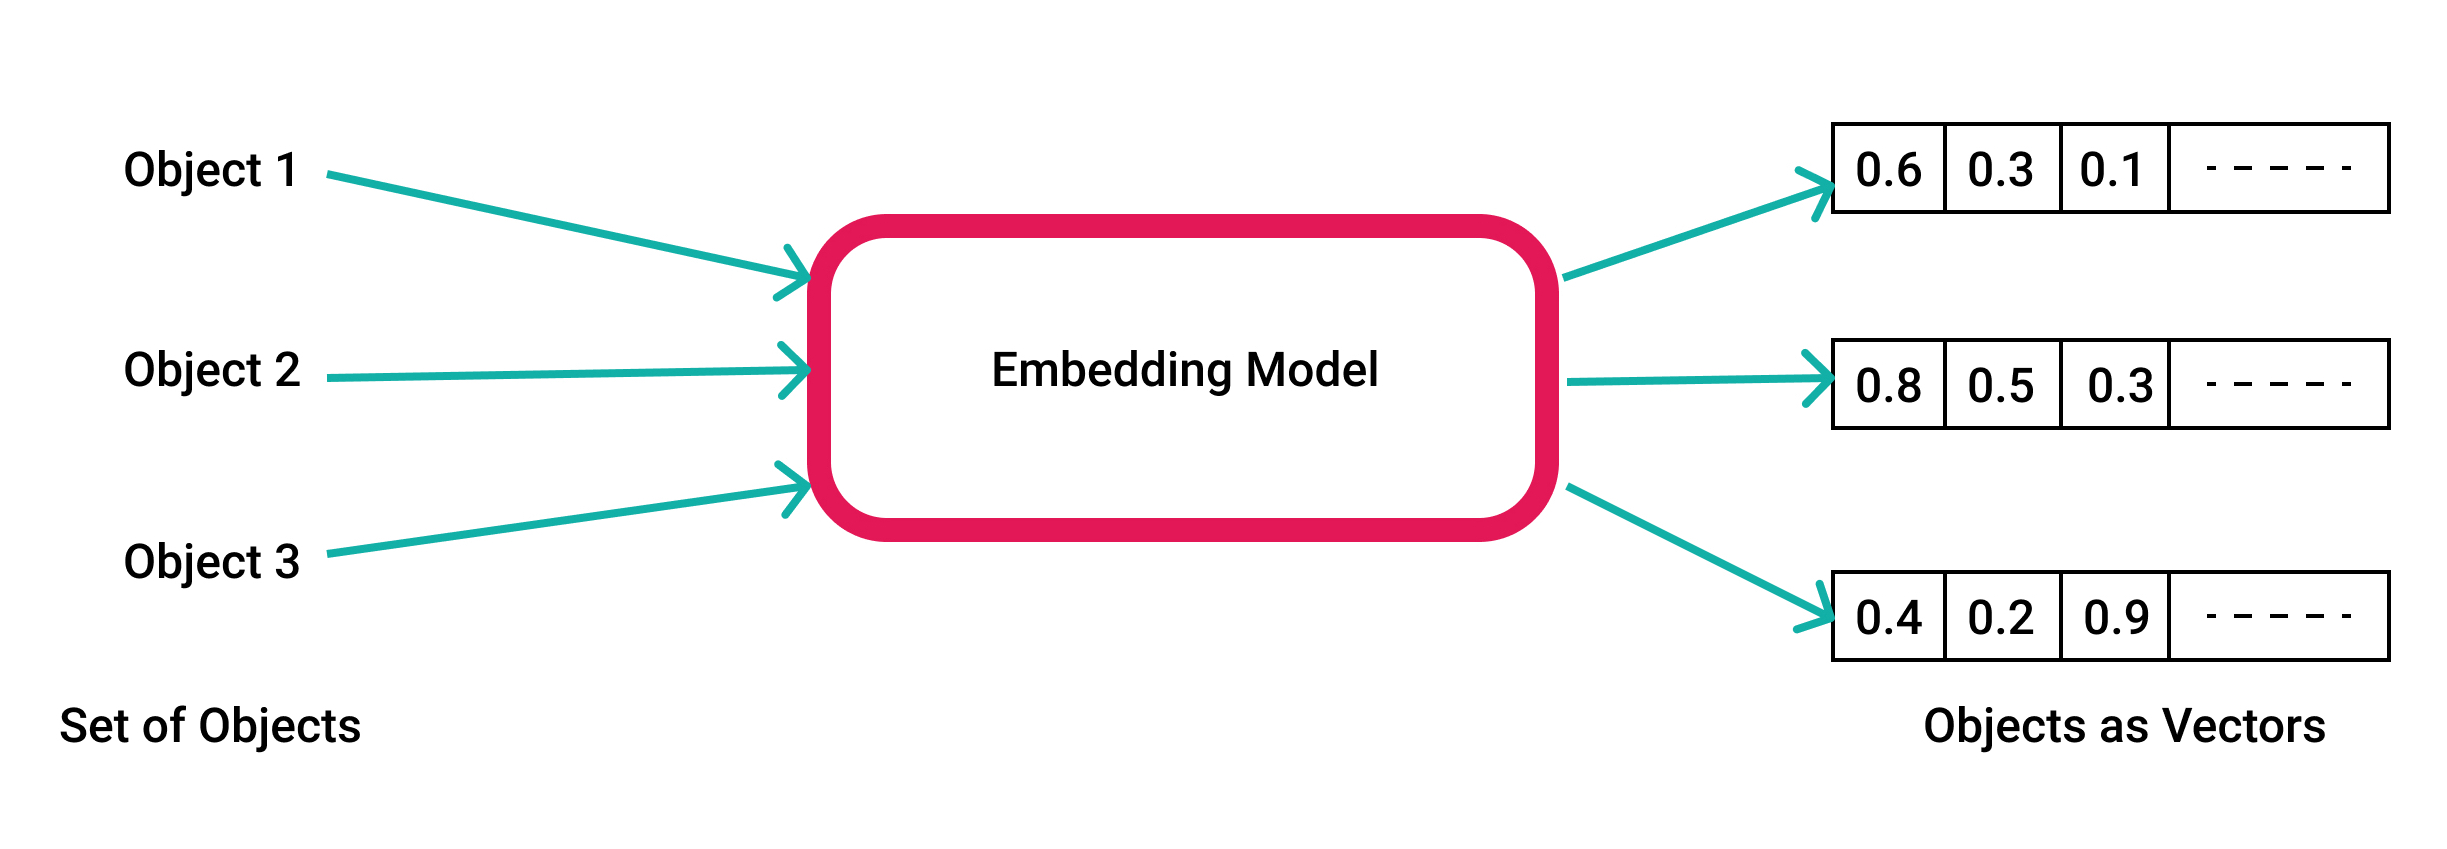

In [82]:
from IPython.display import Image
Image("https://www.pinecone.io/images/vector_embeddings.jpg")

## Ordinal encoding for ISBN and User-ID

In [289]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
df_sample['Book'] = encoder.fit_transform(df_sample['ISBN'].values.reshape(-1,1)).astype("int32")
df_sample['User'] = encoder.fit_transform(df_sample['User-ID'].values.reshape(-1,1)).astype("int32")
df_sample['User']

9715       325
6626       325
7975       325
92658      325
40988      325
          ... 
117481     741
111502    1107
209268    1107
41944     1107
210442    1107
Name: User, Length: 188681, dtype: int32

In [290]:
train_df, test_df = train_test_split(df_sample, test_size = 0.1, random_state = 3, shuffle =True)

cold_start_users = train_df.groupby(['User-ID'])['Book-Rating'].count().reset_index(name='Count').sort_values(['Count'], ascending=True)[0:500]['User-ID'].values
cold_start_users
cold_start_users_idx = []

for user in cold_start_users:
    if user in test_df['User-ID'].unique():
        for idx in test_df[test_df['User-ID']==user].index:
            cold_start_users_idx.append(idx)
            

cold_test_df = test_df.loc[cold_start_users_idx,:].copy()

In [291]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

user_len = df_sample["User"].nunique()
book_len = df_sample["Book"].nunique()
embed_dim = 64

user_input = keras.Input(
    shape=(None,), name="user"
) 
book_input = keras.Input(
    shape=(None,), name="book"
)
user_features = layers.Embedding(user_len, embed_dim)(user_input)
book_features = layers.Embedding(book_len, embed_dim)(book_input)
x = layers.concatenate([user_features, book_features])
out = layers.Dense(1, name="rating")(x)
model = keras.Model(
    inputs=[user_input, book_input],
    outputs=[out],
)
model.summary()

Model: "model_42"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 user (InputLayer)              [(None, None)]       0           []                               
                                                                                                  
 book (InputLayer)              [(None, None)]       0           []                               
                                                                                                  
 embedding_84 (Embedding)       (None, None, 64)     606464      ['user[0][0]']                   
                                                                                                  
 embedding_85 (Embedding)       (None, None, 64)     137792      ['book[0][0]']                   
                                                                                           

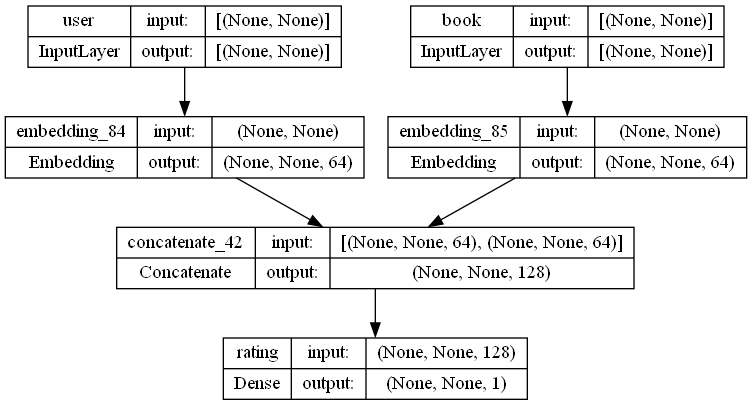

In [292]:
keras.utils.plot_model(model, "model.png", show_shapes=True)

In [293]:
model.compile(
    optimizer = keras.optimizers.Adam(1e-3),
    loss = keras.losses.MeanSquaredError(),
    metrics = [keras.metrics.RootMeanSquaredError(), keras.metrics.MeanAbsoluteError()]
)

model.fit(
    {"user": train_df['User'].values.reshape(-1,1), "book": train_df['Book'].values.reshape(-1,1)},
    {"rating":train_df['Book-Rating'].values},
    epochs=10,
    batch_size=128,
)

Epoch 1/10
1327/1327 [==============================] - 8s 5ms/step - loss: 8.1001 - root_mean_squared_error: 2.8462 - mean_absolute_error: 2.0738
Epoch 2/10
1327/1327 [==============================] - 7s 5ms/step - loss: 2.3483 - root_mean_squared_error: 1.5324 - mean_absolute_error: 1.2415
Epoch 3/10
1327/1327 [==============================] - 8s 6ms/step - loss: 2.3526 - root_mean_squared_error: 1.5338 - mean_absolute_error: 1.2422
Epoch 4/10
1327/1327 [==============================] - 7s 6ms/step - loss: 2.3675 - root_mean_squared_error: 1.5387 - mean_absolute_error: 1.2412
Epoch 5/10
1327/1327 [==============================] - 7s 5ms/step - loss: 2.3690 - root_mean_squared_error: 1.5392 - mean_absolute_error: 1.2412
Epoch 6/10
1327/1327 [==============================] - 7s 5ms/step - loss: 2.3618 - root_mean_squared_error: 1.5368 - mean_absolute_error: 1.2413
Epoch 7/10
1327/1327 [==============================] - 7s 5ms/step - loss: 2.3598 - root_mean_squared_error: 1.5362 -

In [294]:
model.evaluate({"user": test_df['User'].values.reshape(-1,1), "book": test_df['Book'].values.reshape(-1,1)},
               {"rating":test_df['Book-Rating'].values})

590/590 [==============================] - 1s 871us/step - loss: 2.3258 - root_mean_squared_error: 1.5249 - mean_absolute_error: 1.2289


[2.3258163928985596, 1.524869680404663, 1.2289193868637085]

**Evaluation of model:**
- MSE: 2.32
- RMSE: 1.52
- MAE : 1.25

**Performance: Better than MF but worse than item based Collaborative Filtering, when the latter doesn't fail to predict. Also worse than hybrid model. Computational time: Much faster than all the previous methods. Memory: Requires much less memory, because the r matrix is not needed**

In [295]:
model.evaluate({"user": cold_test_df['User'].values.reshape(-1,1), "book": cold_test_df['Book'].values.reshape(-1,1)},
               {"rating":cold_test_df['Book-Rating'].values})

22/22 [==============================] - 0s 1ms/step - loss: 3.4246 - root_mean_squared_error: 1.8571 - mean_absolute_error: 1.4952


[3.424553871154785, 1.8571422100067139, 1.4951552152633667]

**It's performance on cold start dataset is better than collaborative filtering and similar to the hybrid model**

In [302]:
def recommend_book_dl(df, model, user, num_recommendations):
    ratings = []
    books = []
    isbns = []
    users = []
    ord_user = df[df["User-ID"] == user]["User"].values[0]
    
    for book in df['Book'].unique():
        if book not in df[df['User-ID'] == user]['Book'].values:
            books.append(book)
            users.append(ord_user)
            isbns.append(df[df['Book'] == book]['ISBN'].values[0])
            
    ratings = model.predict(x={"user": np.array(users).reshape(-1,1), 
                               "book": np.array(books).reshape(-1,1)}).reshape(-1)
    
    preds = pd.DataFrame([ratings, isbns])
    preds = preds.sort_values(by = 0, axis = 1, ascending = False)
    print('The list of the Recommended Books \n')
    rank = 1
    for i,recommended_book in enumerate(preds.iloc[1 , 0:num_recommendations].values):
        print('{}: Book Title: {} - Author: {} - Predicted Rating: {}'.format(rank, book_name(recommended_book)
                                                                            ,book_author(recommended_book), preds.iloc[0,i]))
        rank = rank + 1
        
recommend_book_dl(df_sample, model, 76352, 5)

47/47 [==============================] - 0s 804us/step
The list of the Recommended Books 

1: Book Title: Griffin &amp; Sabine: An Extraordinary Correspondence - Author: Nick Bantock - Predicted Rating: 7.249154090881348
2: Book Title: Harry Potter and the Prisoner of Azkaban (Book 3) - Author: J. K. Rowling - Predicted Rating: 7.235781669616699
3: Book Title: Harry Potter and the Goblet of Fire (Book 4) - Author: J. K. Rowling - Predicted Rating: 7.204267501831055
4: Book Title: Harry Potter and the Sorcerer's Stone (Book 1) - Author: J. K. Rowling - Predicted Rating: 7.0373406410217285
5: Book Title: 84 Charing Cross Road - Author: Helene Hanff - Predicted Rating: 7.0335493087768555


## Using LSTM after Embedding 

Studies in DL have shown that adding a recurrent layer, such as LSTM after Embedding with a non-linear activation function helps the model to train the embedding layer more accurately and thus leading to better performance. The default activation function for lstm is **tanh**

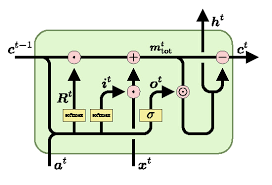

In [303]:
from IPython.display import Image
Image("lstm3.png")

In [304]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

user_len = df_sample["User"].nunique()
book_len = df_sample["Book"].nunique()
embed_dim = 64

user_input = keras.Input(
    shape=(None,), name="user"
) 
book_input = keras.Input(
    shape=(None,), name="book"
)
user_features = layers.Embedding(user_len, embed_dim)(user_input)
book_features = layers.Embedding(book_len, embed_dim)(book_input)
user_features = layers.LSTM(32)(user_features)
book_features = layers.LSTM(32)(book_features)
x = layers.concatenate([user_features, book_features])
out = layers.Dense(1, name="rating")(x)
model = keras.Model(
    inputs=[user_input, book_input],
    outputs=[out],
)
model.summary()

Model: "model_44"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 user (InputLayer)              [(None, None)]       0           []                               
                                                                                                  
 book (InputLayer)              [(None, None)]       0           []                               
                                                                                                  
 embedding_88 (Embedding)       (None, None, 64)     606464      ['user[0][0]']                   
                                                                                                  
 embedding_89 (Embedding)       (None, None, 64)     137792      ['book[0][0]']                   
                                                                                           

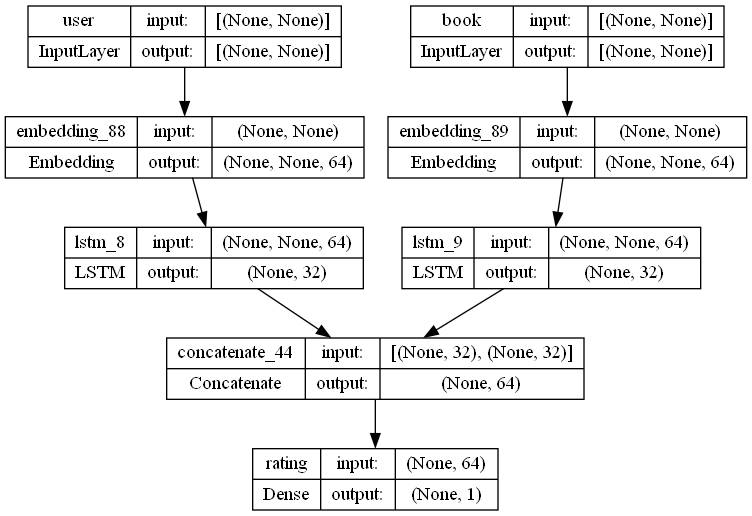

In [305]:
keras.utils.plot_model(model, "model.png", show_shapes=True)

In [306]:
model.compile(
    optimizer = keras.optimizers.Adam(1e-3),
    loss = keras.losses.MeanSquaredError(),
    metrics = [keras.metrics.RootMeanSquaredError(), keras.metrics.MeanAbsoluteError()]
)

In [307]:
model.fit(
    {"user": train_df['User'].values.reshape(-1,1), "book": train_df['Book'].values.reshape(-1,1)},
    {"rating":train_df['Book-Rating'].values},
    epochs=10,
    batch_size=128,
)

Epoch 1/10
1327/1327 [==============================] - 11s 6ms/step - loss: 5.2347 - root_mean_squared_error: 2.2879 - mean_absolute_error: 1.5838
Epoch 2/10
1327/1327 [==============================] - 7s 6ms/step - loss: 1.9380 - root_mean_squared_error: 1.3921 - mean_absolute_error: 1.0437
Epoch 3/10
1327/1327 [==============================] - 7s 6ms/step - loss: 1.8579 - root_mean_squared_error: 1.3631 - mean_absolute_error: 1.0148
Epoch 4/10
1327/1327 [==============================] - 8s 6ms/step - loss: 1.8301 - root_mean_squared_error: 1.3528 - mean_absolute_error: 1.0035
Epoch 5/10
1327/1327 [==============================] - 7s 6ms/step - loss: 1.8109 - root_mean_squared_error: 1.3457 - mean_absolute_error: 0.9949
Epoch 6/10
1327/1327 [==============================] - 8s 6ms/step - loss: 1.7961 - root_mean_squared_error: 1.3402 - mean_absolute_error: 0.9876
Epoch 7/10
1327/1327 [==============================] - 8s 6ms/step - loss: 1.7864 - root_mean_squared_error: 1.3366 

In [308]:
model.evaluate({"user": test_df['User'].values.reshape(-1,1), "book": test_df['Book'].values.reshape(-1,1)},
               {"rating":test_df['Book-Rating'].values})

590/590 [==============================] - 1s 1ms/step - loss: 1.9561 - root_mean_squared_error: 1.3986 - mean_absolute_error: 1.0367


[1.9560725688934326, 1.3985966444015503, 1.036668300628662]

**Evaluation of model:**
- MSE: 1.97
- RMSE: 1.40
- MAE : 1.02

**Better than the previous model and similar to the hybrid model**

In [309]:
model.evaluate({"user": cold_test_df['User'].values.reshape(-1,1), "book": cold_test_df['Book'].values.reshape(-1,1)},
               {"rating":cold_test_df['Book-Rating'].values})

22/22 [==============================] - 0s 1ms/step - loss: 3.1267 - root_mean_squared_error: 1.7682 - mean_absolute_error: 1.3420


[3.1266701221466064, 1.7682392597198486, 1.341965913772583]

**It also performs better on cold start dataset**

In [310]:
recommend_book_dl(df_sample, model, 76352, 5)

47/47 [==============================] - 1s 934us/step
The list of the Recommended Books 

1: Book Title: Harry Potter and the Prisoner of Azkaban (Book 3) - Author: J. K. Rowling - Predicted Rating: 6.972877502441406
2: Book Title: Harry Potter and the Goblet of Fire (Book 4) - Author: J. K. Rowling - Predicted Rating: 6.8988847732543945
3: Book Title: Griffin &amp; Sabine: An Extraordinary Correspondence - Author: Nick Bantock - Predicted Rating: 6.829013824462891
4: Book Title: Harry Potter and the Sorcerer's Stone (Book 1) - Author: J. K. Rowling - Predicted Rating: 6.711637496948242
5: Book Title: Harry Potter and the Chamber of Secrets (Book 2) - Author: J. K. Rowling - Predicted Rating: 6.69654655456543


## Adding More Features

To derive better performance we will include more features to the model. More specifically we will include Age, Book-Author and Publisher. Even though Age is numeric, it does not make sense to include it as it is, because the rating isn't changing with every change in Age. Alternative, we will categorise each person within an age range: [0,18], [18,40], [40,65], [65,100]

In [311]:
age_0_18 = []
age_18_40 = []
age_40_65 = []
age_65_100 = []

for age in df_sample['Age'].values:
    if age < 18:
        age_0_18.append(1)
        age_18_40.append(0)
        age_40_65.append(0)
        age_65_100.append(0)
    elif age < 40:
        age_0_18.append(0)
        age_18_40.append(1)
        age_40_65.append(0)
        age_65_100.append(0)
    elif age < 65:
        age_0_18.append(0)
        age_18_40.append(0)
        age_40_65.append(1)
        age_65_100.append(0)
    else:
        age_0_18.append(0)
        age_18_40.append(0)
        age_40_65.append(0)
        age_65_100.append(1)
        
df_sample["Age_0_18"] = age_0_18
df_sample["Age_18_40"] = age_18_40
df_sample["Age_40_65"] = age_40_65
df_sample["Age_65_100"] = age_65_100

encoder = OrdinalEncoder()
df_sample['Author-Ord'] = encoder.fit_transform(df_sample['Book-Author'].values.reshape(-1,1)).astype("int32")
df_sample['Publisher-Ord'] = encoder.fit_transform(df_sample['Publisher'].values.reshape(-1,1)).astype("int32")

df_sample.head()

,User-ID,ISBN,Book-Rating,Location,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher,Book,User,Age_0_18,Age_18_40,Age_40_65,Age_65_100,Author-Ord,Publisher-Ord
9715,11676,0971880107,6.0,"n/a, n/a, n/a",28.501838,Wild Animus,Rich Shapero,2004.000000,Too Far,2080,325,0,1,0,0,612,195
6626,11676,0316666343,5.0,"n/a, n/a, n/a",33.141966,The Lovely Bones: A Novel,Alice Sebold,1998.186296,"Little, Brown",288,325,0,1,0,0,32,106
7975,11676,0385504209,9.0,"n/a, n/a, n/a",30.062890,The Da Vinci Code,Dan Brown,2003.000000,Doubleday,666,325,0,1,0,0,162,48
92658,11676,0060928336,5.5,"n/a, n/a, n/a",37.236293,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997.000000,Perennial,43,325,0,1,0,0,610,139
40988,11676,0312195516,10.0,"n/a, n/a, n/a",35.017670,The Red Tent (Bestselling Backlist),Anita Diamant,1998.000000,Picador USA,215,325,0,1,0,0,40,144


In [312]:
train_df, test_df = train_test_split(df_sample, test_size = 0.1, random_state = 3, shuffle =True)

cold_start_users = train_df.groupby(['User-ID'])['Book-Rating'].count().reset_index(name='Count').sort_values(['Count'], ascending=True)[0:500]['User-ID'].values
cold_start_users
cold_start_users_idx = []

for user in cold_start_users:
    if user in test_df['User-ID'].unique():
        for idx in test_df[test_df['User-ID']==user].index:
            cold_start_users_idx.append(idx)
            

cold_test_df = test_df.loc[cold_start_users_idx,:].copy()

In [313]:
user_len = df_sample["User"].nunique()
book_len = df_sample["Book"].nunique()
author_len = df_sample["Book-Author"].nunique()
publisher_len = df_sample["Publisher"].nunique()
embed_dim = 64

user_input = keras.Input(
    shape=(None,), name="user"
) 
book_input = keras.Input(
    shape=(None,), name="book"
)
author_input = keras.Input(
    shape=(None,), name="author"
)
publisher_input = keras.Input(
    shape=(None,), name="publisher"
)
age_input = keras.Input(
    shape=(4,), name="age"
)

user_features = layers.Embedding(user_len, embed_dim)(user_input)
book_features = layers.Embedding(book_len, embed_dim)(book_input)
author_features = layers.Embedding(author_len, embed_dim)(author_input)
publisher_features = layers.Embedding(publisher_len, embed_dim)(publisher_input)

user_features = layers.LSTM(32)(user_features)
book_features = layers.LSTM(32)(book_features)
author_features = layers.LSTM(32)(author_features)
publisher_features = layers.LSTM(32)(publisher_features)

x = layers.concatenate([user_features, book_features, author_features, publisher_features, age_input])
out = layers.Dense(1, name="rating", activation="relu")(x)

model = keras.Model(
    inputs=[user_input, book_input, author_input, publisher_input, age_input],
    outputs=[out],
)

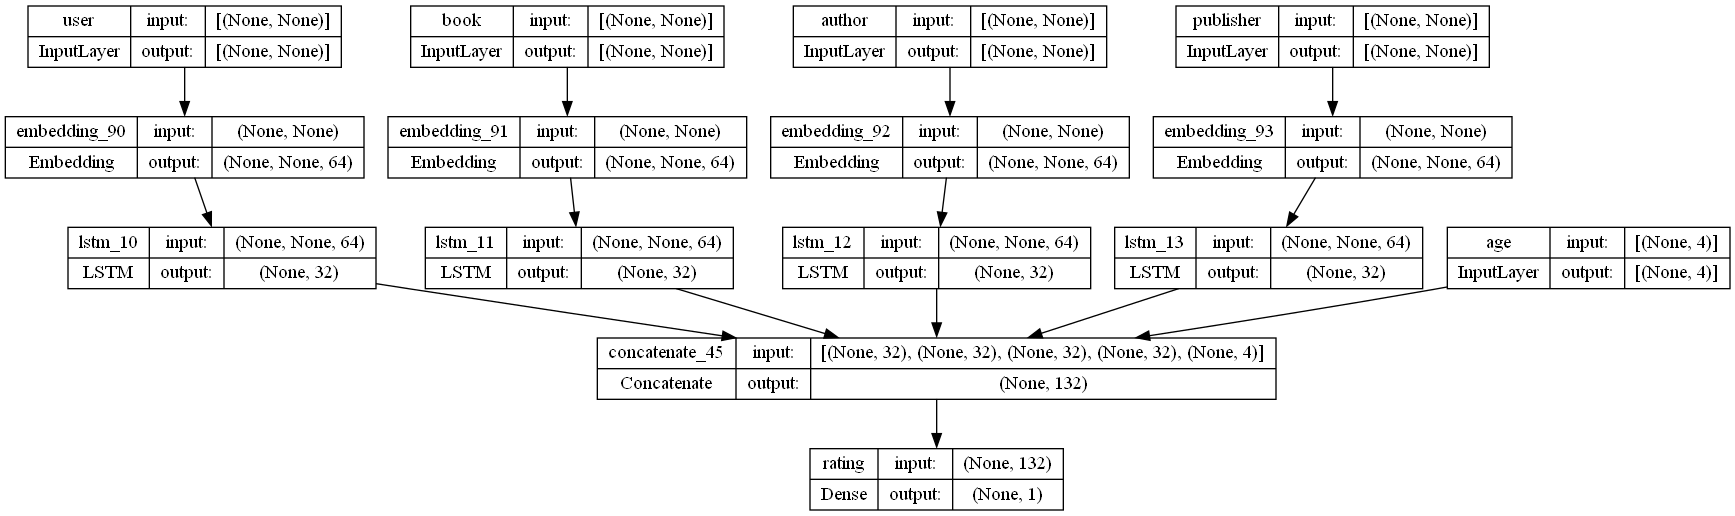

In [314]:
keras.utils.plot_model(model, "model.png", show_shapes=True)

In [315]:
model.compile(
    optimizer = keras.optimizers.Adam(1e-3),
    loss = keras.losses.MeanSquaredError(),
    metrics = [keras.metrics.RootMeanSquaredError(), keras.metrics.MeanAbsoluteError()]
)

In [316]:
model.fit(
    {"user": train_df['User'].values.reshape(-1,1), "book": train_df['Book'].values.reshape(-1,1), 
     "author": train_df['Author-Ord'].values.reshape(-1,1), "publisher": train_df['Publisher-Ord'].values.reshape(-1,1),
     "age": train_df.loc[:,'Age_0_18':'Age_65_100']},
    {"rating":train_df['Book-Rating'].values},
    epochs=10,
    batch_size=128,
)

Epoch 1/10
1327/1327 [==============================] - 14s 6ms/step - loss: 4.2042 - root_mean_squared_error: 2.0504 - mean_absolute_error: 1.4088
Epoch 2/10
1327/1327 [==============================] - 8s 6ms/step - loss: 1.8857 - root_mean_squared_error: 1.3732 - mean_absolute_error: 1.0175
Epoch 3/10
1327/1327 [==============================] - 9s 7ms/step - loss: 1.8290 - root_mean_squared_error: 1.3524 - mean_absolute_error: 0.9976
Epoch 4/10
1327/1327 [==============================] - 10s 8ms/step - loss: 1.8064 - root_mean_squared_error: 1.3440 - mean_absolute_error: 0.9908
Epoch 5/10
1327/1327 [==============================] - 10s 8ms/step - loss: 1.7908 - root_mean_squared_error: 1.3382 - mean_absolute_error: 0.9849
Epoch 6/10
1327/1327 [==============================] - 9s 7ms/step - loss: 1.7810 - root_mean_squared_error: 1.3345 - mean_absolute_error: 0.9817
Epoch 7/10
1327/1327 [==============================] - 10s 8ms/step - loss: 1.7722 - root_mean_squared_error: 1.33

In [317]:
model.evaluate({"user": test_df['User'].values.reshape(-1,1), "book": test_df['Book'].values.reshape(-1,1),
                "author": test_df['Author-Ord'].values.reshape(-1,1), "publisher": test_df['Publisher-Ord'].values.reshape(-1,1),
                "age": test_df.loc[:,'Age_0_18':'Age_65_100']},
               {"rating":test_df['Book-Rating'].values})

590/590 [==============================] - 2s 1ms/step - loss: 1.9462 - root_mean_squared_error: 1.3951 - mean_absolute_error: 1.0338


[1.9461944103240967, 1.3950607776641846, 1.0338102579116821]

In [318]:
model.evaluate({"user": cold_test_df['User'].values.reshape(-1,1), "book": cold_test_df['Book'].values.reshape(-1,1),
                "author": cold_test_df['Author-Ord'].values.reshape(-1,1), "publisher": cold_test_df['Publisher-Ord'].values.reshape(-1,1),
                "age": cold_test_df.loc[:,'Age_0_18':'Age_65_100']},
               {"rating": cold_test_df['Book-Rating'].values})

22/22 [==============================] - 0s 2ms/step - loss: 3.1001 - root_mean_squared_error: 1.7607 - mean_absolute_error: 1.3388


[3.1000876426696777, 1.7607065439224243, 1.3387528657913208]

**Comparing the DL models:**
- The first Model is linear and uses only MLP and Embedding, thus cannot yield good performance
- The second and the third model are performing much better than the first model, while the former models yield identical performance
- The first one is the fastest to train and evaluate

Thus, we can conclude that the additional features are **redudant** and the addition of recurrent layer with non-linearity **improves the performance in cost of speed**.

# Different DL models for Recommendation System

## Matrix Factorization with DL

In [319]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

user_len = df_sample["User"].nunique()
book_len = df_sample["Book"].nunique()
embed_dim = 64

user_input = keras.Input(
    shape=(None,), name="user"
) 
book_input = keras.Input(
    shape=(None,), name="book"
)
user_features = layers.Embedding(user_len, embed_dim)(user_input)
book_features = layers.Embedding(book_len, embed_dim)(book_input)
user_bias =  layers.Embedding(user_len, 1)(user_input)
book_bias =  layers.Embedding(user_len, 1)(book_input)
user_features = layers.Reshape(target_shape=(embed_dim,))(user_features)
book_features = layers.Reshape(target_shape=(embed_dim,))(book_features)
x1 = layers.Dot(normalize=True,axes = 1)([user_features, book_features])
x2 = layers.Add()([user_bias, book_bias])
x = layers.Add()([x1,x2])
out = layers.Dense(1, name="rating")(x)
model = keras.Model(
    inputs=[user_input, book_input],
    outputs=[out],
)
model.summary()

Model: "model_46"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 user (InputLayer)              [(None, None)]       0           []                               
                                                                                                  
 book (InputLayer)              [(None, None)]       0           []                               
                                                                                                  
 embedding_94 (Embedding)       (None, None, 64)     606464      ['user[0][0]']                   
                                                                                                  
 embedding_95 (Embedding)       (None, None, 64)     137792      ['book[0][0]']                   
                                                                                           

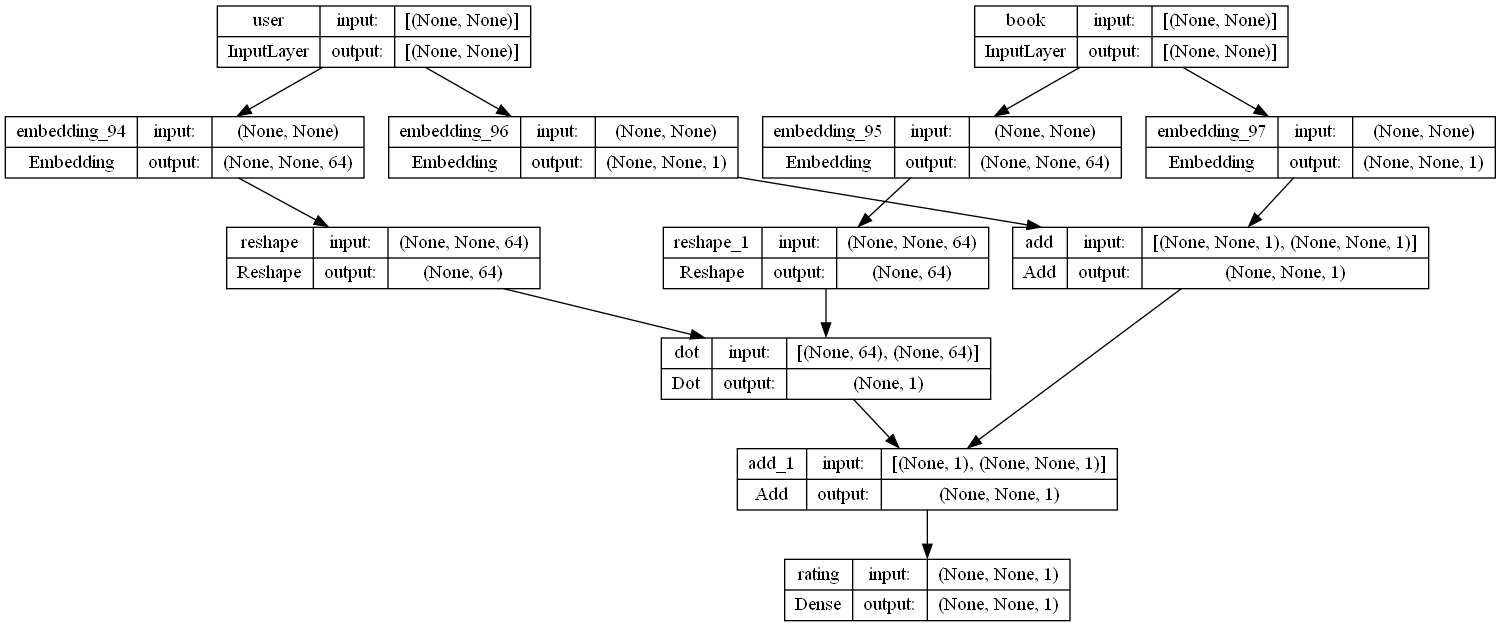

In [320]:
keras.utils.plot_model(model, "model.png", show_shapes=True)

In [321]:
model.compile(
    optimizer = keras.optimizers.Adam(1e-3),
    loss = keras.losses.MeanSquaredError(),
    metrics = [keras.metrics.RootMeanSquaredError(), keras.metrics.MeanAbsoluteError()]
)

model.fit(
    {"user": train_df['User'].values.reshape(-1,1), "book": train_df['Book'].values.reshape(-1,1)},
    {"rating":train_df['Book-Rating'].values},
    epochs=10,
    batch_size=128,
)

Epoch 1/10
1327/1327 [==============================] - 9s 6ms/step - loss: 20.4565 - root_mean_squared_error: 4.5232 - mean_absolute_error: 3.8379
Epoch 2/10
1327/1327 [==============================] - 8s 6ms/step - loss: 2.6973 - root_mean_squared_error: 1.6424 - mean_absolute_error: 1.2293
Epoch 3/10
1327/1327 [==============================] - 8s 6ms/step - loss: 2.3562 - root_mean_squared_error: 1.5350 - mean_absolute_error: 1.2319
Epoch 4/10
1327/1327 [==============================] - 8s 6ms/step - loss: 2.3442 - root_mean_squared_error: 1.5311 - mean_absolute_error: 1.2410
Epoch 5/10
1327/1327 [==============================] - 7s 6ms/step - loss: 2.3480 - root_mean_squared_error: 1.5323 - mean_absolute_error: 1.2410
Epoch 6/10
1327/1327 [==============================] - 8s 6ms/step - loss: 2.3543 - root_mean_squared_error: 1.5344 - mean_absolute_error: 1.2411
Epoch 7/10
1327/1327 [==============================] - 7s 6ms/step - loss: 2.3585 - root_mean_squared_error: 1.5358 

In [322]:
model.evaluate({"user": test_df['User'].values.reshape(-1,1), "book": test_df['Book'].values.reshape(-1,1)},
               {"rating":test_df['Book-Rating'].values})

590/590 [==============================] - 1s 929us/step - loss: 2.3251 - root_mean_squared_error: 1.5246 - mean_absolute_error: 1.2293


[2.325134515762329, 1.5246437788009644, 1.2292571067810059]

In [323]:
model.evaluate({"user": cold_test_df['User'].values.reshape(-1,1), "book": cold_test_df['Book'].values.reshape(-1,1)},
               {"rating":cold_test_df['Book-Rating'].values})

22/22 [==============================] - 0s 1000us/step - loss: 3.4743 - root_mean_squared_error: 1.8704 - mean_absolute_error: 1.4920


[3.4743094444274902, 1.8703709840774536, 1.4920048713684082]

In [324]:
recommend_book_dl(df_sample, model, 76352, 5)

47/47 [==============================] - 0s 913us/step
The list of the Recommended Books 

1: Book Title: The Cat Who Said Cheese - Author: Lilian Jackson Braun - Predicted Rating: 6.611693382263184
2: Book Title: The Scarlet Letter - Author: NATHANIEL HAWTHORNE - Predicted Rating: 6.604936599731445
3: Book Title: Fortune's Rocks: A Novel - Author: Anita Shreve - Predicted Rating: 6.602542877197266
4: Book Title: Pink Slip - Author: RITA CIRESI - Predicted Rating: 6.579554557800293
5: Book Title: Ralph's Party - Author: Lisa Jewell - Predicted Rating: 6.569933891296387


**Better than vanilla Matrix Factorization, but it performs worse than Hybrid or Recurrent DL models**

### Adding Recurrent Non-Linear Layer

In [325]:
user_len = df_sample["User"].nunique()
book_len = df_sample["Book"].nunique()
embed_dim = 64
mlp_dim = 128

user_input = keras.Input(
    shape=(None,), name="user"
) 
book_input = keras.Input(
    shape=(None,), name="book"
)
user_features = layers.Embedding(user_len, embed_dim)(user_input)
book_features = layers.Embedding(book_len, embed_dim)(book_input)
user_features = layers.LSTM(32)(user_features)
book_features = layers.LSTM(32)(book_features)
x = layers.Dot(axes = 1)([user_features, book_features])
out = layers.Dense(1, name="rating")(x)
model = keras.Model(
    inputs=[user_input, book_input],
    outputs=[out],
)
model.summary()

Model: "model_47"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 user (InputLayer)              [(None, None)]       0           []                               
                                                                                                  
 book (InputLayer)              [(None, None)]       0           []                               
                                                                                                  
 embedding_98 (Embedding)       (None, None, 64)     606464      ['user[0][0]']                   
                                                                                                  
 embedding_99 (Embedding)       (None, None, 64)     137792      ['book[0][0]']                   
                                                                                           

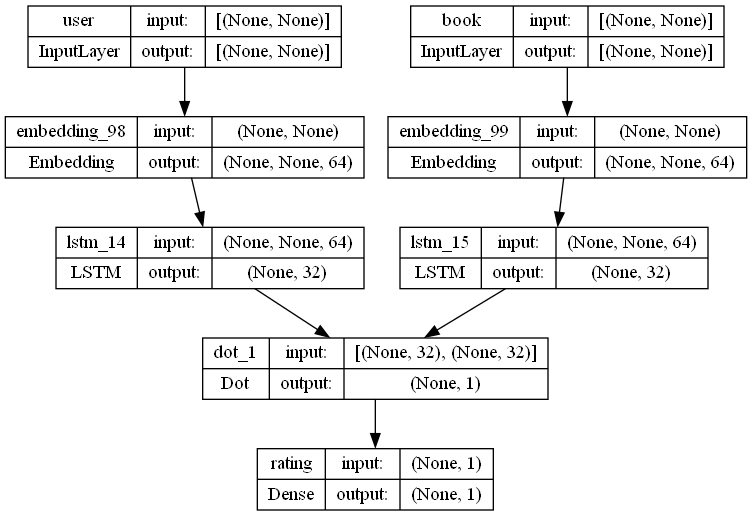

In [326]:
keras.utils.plot_model(model, "model.png", show_shapes=True)

In [327]:
model.compile(
    optimizer = keras.optimizers.Adam(1e-3),
    loss = keras.losses.MeanSquaredError(),
    metrics = [keras.metrics.RootMeanSquaredError(), keras.metrics.MeanAbsoluteError()]
)

model.fit(
    {"user": train_df['User'].values.reshape(-1,1), "book": train_df['Book'].values.reshape(-1,1)},
    {"rating":train_df['Book-Rating'].values},
    epochs=10,
    batch_size=128,
)

Epoch 1/10
1327/1327 [==============================] - 12s 7ms/step - loss: 7.0056 - root_mean_squared_error: 2.6468 - mean_absolute_error: 1.8225
Epoch 2/10
1327/1327 [==============================] - 9s 7ms/step - loss: 1.9836 - root_mean_squared_error: 1.4084 - mean_absolute_error: 1.0652
Epoch 3/10
1327/1327 [==============================] - 8s 6ms/step - loss: 1.8854 - root_mean_squared_error: 1.3731 - mean_absolute_error: 1.0267
Epoch 4/10
1327/1327 [==============================] - 8s 6ms/step - loss: 1.8431 - root_mean_squared_error: 1.3576 - mean_absolute_error: 1.0085
Epoch 5/10
1327/1327 [==============================] - 9s 6ms/step - loss: 1.8172 - root_mean_squared_error: 1.3480 - mean_absolute_error: 0.9978
Epoch 6/10
1327/1327 [==============================] - 9s 7ms/step - loss: 1.7978 - root_mean_squared_error: 1.3408 - mean_absolute_error: 0.9878
Epoch 7/10
1327/1327 [==============================] - 9s 7ms/step - loss: 1.7823 - root_mean_squared_error: 1.3350 

In [328]:
model.evaluate({"user": test_df['User'].values.reshape(-1,1), "book": test_df['Book'].values.reshape(-1,1)},
               {"rating":test_df['Book-Rating'].values})

590/590 [==============================] - 2s 1ms/step - loss: 1.9486 - root_mean_squared_error: 1.3959 - mean_absolute_error: 1.0477


[1.9485602378845215, 1.3959083557128906, 1.0476624965667725]

In [329]:
model.evaluate({"user": cold_test_df['User'].values.reshape(-1,1), "book": cold_test_df['Book'].values.reshape(-1,1)},
               {"rating":cold_test_df['Book-Rating'].values})

22/22 [==============================] - 0s 2ms/step - loss: 3.0797 - root_mean_squared_error: 1.7549 - mean_absolute_error: 1.3372


[3.0796866416931152, 1.7549035549163818, 1.3371524810791016]

**It is as good as the previous best ML model**

## NeuMF
NeuMF fuses two subnetworks. The GMF is a generic neural network version of matrix factorization where the input is the elementwise product of user and item latent factors. It consists of two neural layers.

Another component of this model is MLP. To enrich model flexibility, the MLP subnetwork does not share user and item embeddings with GMF. It uses the concatenation of user and item embeddings as input. With the complicated connections and nonlinear transformations, it is capable of estimating the intricate interactions between users and items.

To fuse the results of GMF and MLP, instead of simple addition, NeuMF concatenates the second last layers of two subnetworks to create a feature vector which can be passed to the further layers.

In [330]:
user_len = df_sample["User"].nunique()
book_len = df_sample["Book"].nunique()
embed_dim = 64
mlp_dim = 64

user_input = keras.Input(
    shape=(None,), name="user"
) 
book_input = keras.Input(
    shape=(None,), name="book"
)
p_mf = layers.Embedding(user_len, embed_dim)(user_input)
p_mf = layers.Reshape(target_shape=(embed_dim,))(p_mf)
q_mf = layers.Embedding(book_len, embed_dim)(book_input)
q_mf = layers.Reshape(target_shape=(embed_dim,))(q_mf)
gmf = layers.Multiply()([p_mf, q_mf])

p_mlp = layers.Embedding(user_len, embed_dim)(user_input)
p_mlp = layers.Reshape(target_shape=(embed_dim,))(p_mlp)
q_mlp = layers.Embedding(book_len, embed_dim)(book_input)
q_mlp = layers.Reshape(target_shape=(embed_dim,))(q_mlp)
mlp = layers.concatenate([p_mlp, q_mlp])

mlp = layers.Dense(2*mlp_dim, activation = 'relu', kernel_regularizer=keras.regularizers.L1(0.01),
                     activity_regularizer=keras.regularizers.L2(0.01))(mlp)
x = layers.concatenate([mlp, gmf])
out = layers.Dense(1, name="rating")(x)
model = keras.Model(
    inputs=[user_input, book_input],
    outputs=[out],
)
model.summary()

Model: "model_48"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 user (InputLayer)              [(None, None)]       0           []                               
                                                                                                  
 book (InputLayer)              [(None, None)]       0           []                               
                                                                                                  
 embedding_102 (Embedding)      (None, None, 64)     606464      ['user[0][0]']                   
                                                                                                  
 embedding_103 (Embedding)      (None, None, 64)     137792      ['book[0][0]']                   
                                                                                           

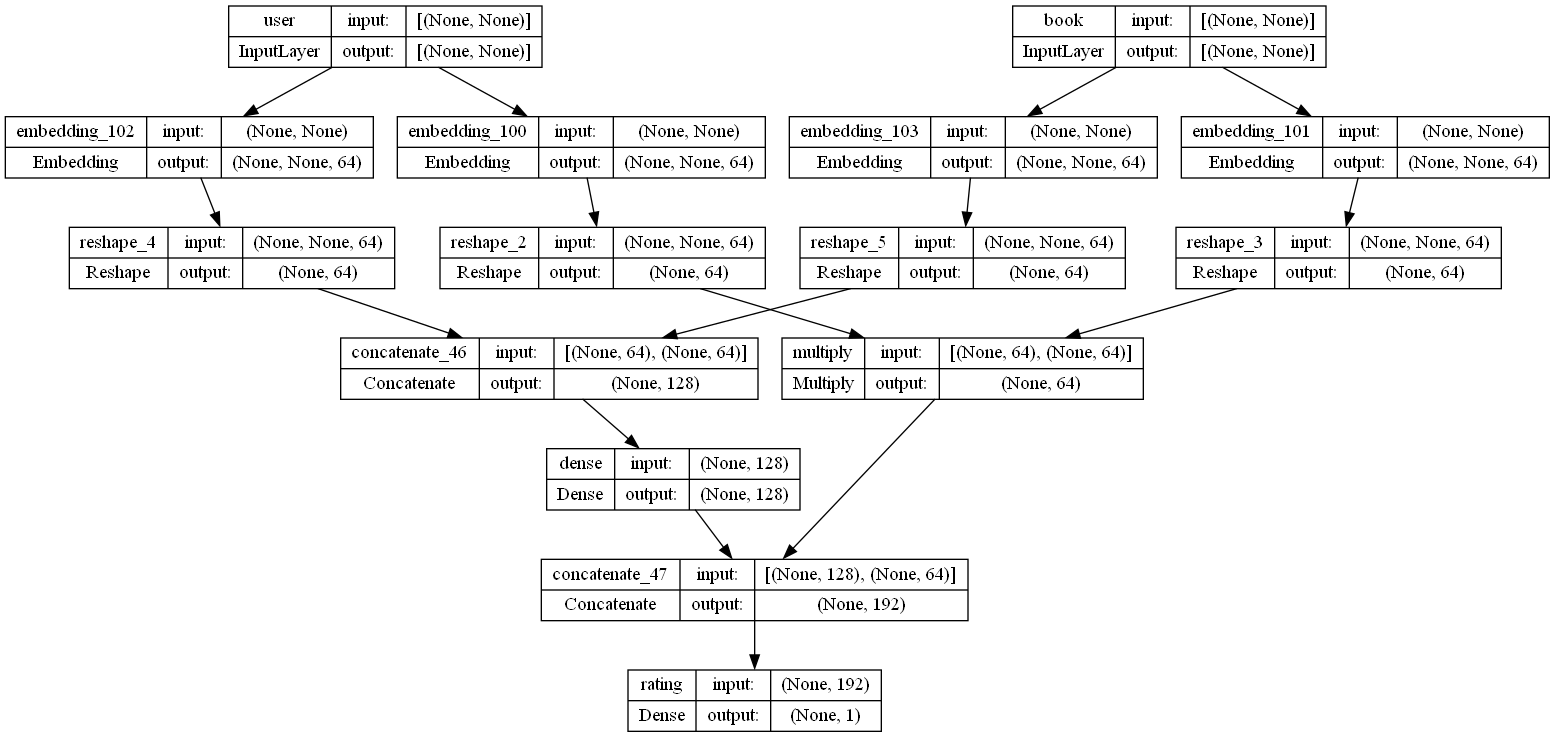

In [331]:
keras.utils.plot_model(model, "model.png", show_shapes=True)

In [332]:
model.compile(
    optimizer = keras.optimizers.Adam(1e-3),
    loss = keras.losses.MeanSquaredError(),
    metrics = [keras.metrics.RootMeanSquaredError(), keras.metrics.MeanAbsoluteError()]
)

model.fit(
    {"user": train_df['User'].values.reshape(-1,1), "book": train_df['Book'].values.reshape(-1,1)},
    {"rating":train_df['Book-Rating'].values},
    epochs=4,
    batch_size=128,
)

Epoch 1/4
1327/1327 [==============================] - 15s 11ms/step - loss: 5.9131 - root_mean_squared_error: 2.1721 - mean_absolute_error: 1.5395
Epoch 2/4
1327/1327 [==============================] - 14s 11ms/step - loss: 2.0697 - root_mean_squared_error: 1.3915 - mean_absolute_error: 1.0594
Epoch 3/4
1327/1327 [==============================] - 14s 11ms/step - loss: 1.1468 - root_mean_squared_error: 1.0255 - mean_absolute_error: 0.7376
Epoch 4/4
1327/1327 [==============================] - 12s 9ms/step - loss: 0.5559 - root_mean_squared_error: 0.6993 - mean_absolute_error: 0.4989


In [333]:
model.evaluate({"user": test_df['User'].values.reshape(-1,1), "book": test_df['Book'].values.reshape(-1,1)},
               {"rating":test_df['Book-Rating'].values})

590/590 [==============================] - 1s 910us/step - loss: 2.3135 - root_mean_squared_error: 1.5009 - mean_absolute_error: 1.1572


[2.3135273456573486, 1.5009067058563232, 1.1572092771530151]

### Adding LSTM

In [334]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

user_len = df_sample["User"].nunique()
book_len = df_sample["Book"].nunique()
embed_dim = 64
mlp_dim = 64

user_input = keras.Input(
    shape=(None,), name="user"
) 
book_input = keras.Input(
    shape=(None,), name="book"
)
p_mf = layers.Embedding(user_len, embed_dim)(user_input)
p_mf = layers.LSTM(32)(p_mf)
q_mf = layers.Embedding(book_len, embed_dim)(book_input)
q_mf = layers.LSTM(32)(q_mf)
gmf = layers.Multiply()([p_mf, q_mf])
p_mlp =  layers.Embedding(user_len, embed_dim)(user_input)
p_mlp = layers.LSTM(32)(p_mlp)
q_mlp =  layers.Embedding(book_len, embed_dim)(book_input)
q_mlp = layers.LSTM(32)(q_mlp)
mlp = layers.concatenate([p_mlp, q_mlp])
mlp = layers.Dense(mlp_dim, activation = 'sigmoid', kernel_regularizer=keras.regularizers.L1(0.01),
                     activity_regularizer=keras.regularizers.L2(0.01))(mlp)
x = layers.concatenate([mlp, gmf])
out = layers.Dense(1, name="rating")(x)
model = keras.Model(
    inputs=[user_input, book_input],
    outputs=[out],
)
model.summary()

Model: "model_49"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 user (InputLayer)              [(None, None)]       0           []                               
                                                                                                  
 book (InputLayer)              [(None, None)]       0           []                               
                                                                                                  
 embedding_106 (Embedding)      (None, None, 64)     606464      ['user[0][0]']                   
                                                                                                  
 embedding_107 (Embedding)      (None, None, 64)     137792      ['book[0][0]']                   
                                                                                           

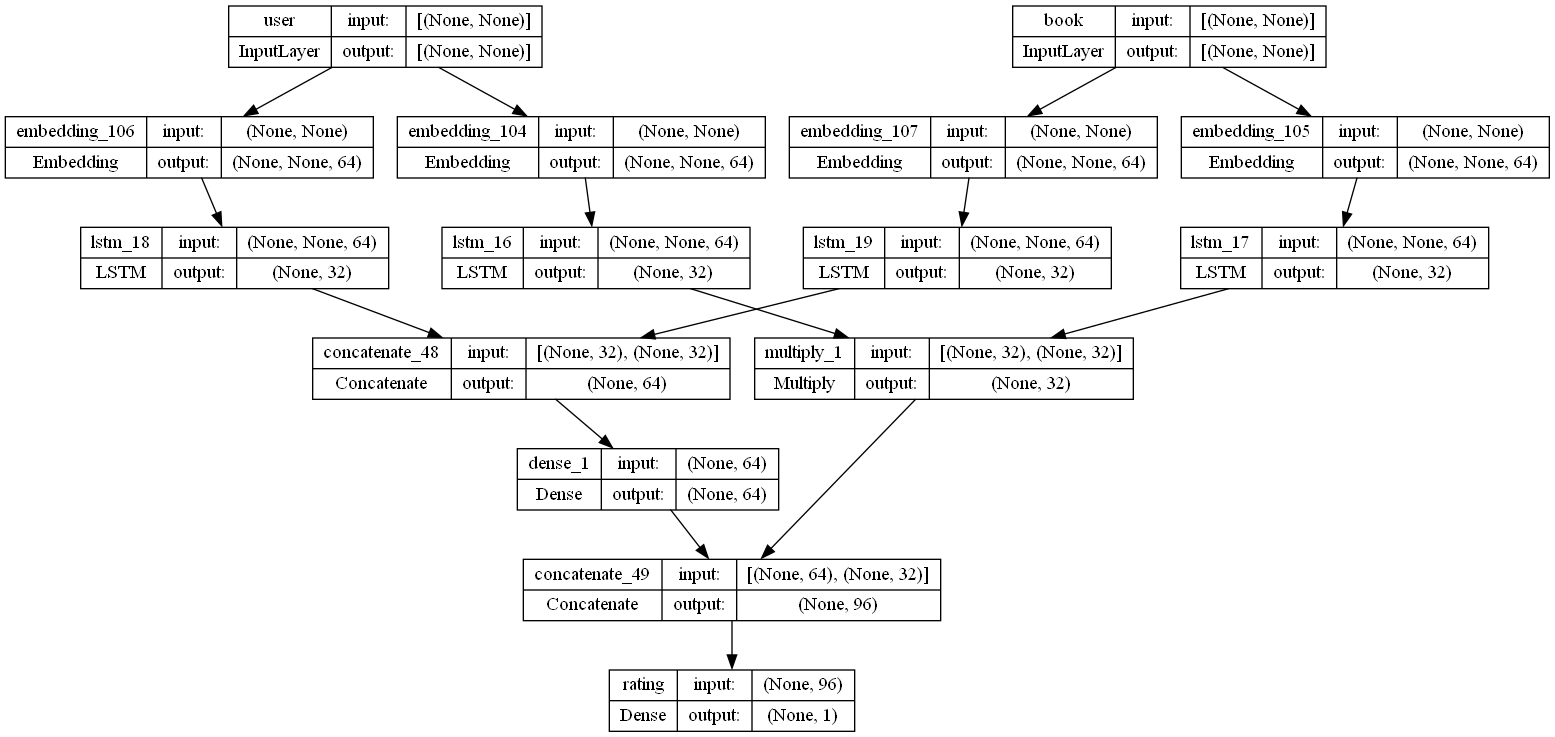

In [335]:
keras.utils.plot_model(model, "model.png", show_shapes=True)

In [336]:
model.compile(
    optimizer = keras.optimizers.Adam(1e-3),
    loss = keras.losses.MeanSquaredError(),
    metrics = [keras.metrics.RootMeanSquaredError(), keras.metrics.MeanAbsoluteError()]
)

model.fit(
    {"user": train_df['User'].values.reshape(-1,1), "book": train_df['Book'].values.reshape(-1,1)},
    {"rating":train_df['Book-Rating'].values},
    epochs=10,
    batch_size=128,
)

Epoch 1/10
1327/1327 [==============================] - 18s 10ms/step - loss: 4.5961 - root_mean_squared_error: 1.9756 - mean_absolute_error: 1.3565
Epoch 2/10
1327/1327 [==============================] - 12s 9ms/step - loss: 2.0245 - root_mean_squared_error: 1.3626 - mean_absolute_error: 0.9943
Epoch 3/10
1327/1327 [==============================] - 12s 9ms/step - loss: 1.9513 - root_mean_squared_error: 1.3421 - mean_absolute_error: 0.9723
Epoch 4/10
1327/1327 [==============================] - 11s 9ms/step - loss: 1.9056 - root_mean_squared_error: 1.3333 - mean_absolute_error: 0.9639
Epoch 5/10
1327/1327 [==============================] - 12s 9ms/step - loss: 1.8698 - root_mean_squared_error: 1.3282 - mean_absolute_error: 0.9598
Epoch 6/10
1327/1327 [==============================] - 12s 9ms/step - loss: 1.8406 - root_mean_squared_error: 1.3245 - mean_absolute_error: 0.9558
Epoch 7/10
1327/1327 [==============================] - 12s 9ms/step - loss: 1.8170 - root_mean_squared_error: 

In [337]:
model.evaluate({"user": test_df['User'].values.reshape(-1,1), "book": test_df['Book'].values.reshape(-1,1)},
               {"rating":test_df['Book-Rating'].values})

590/590 [==============================] - 2s 1ms/step - loss: 2.0132 - root_mean_squared_error: 1.4029 - mean_absolute_error: 0.9836


[2.0131688117980957, 1.4028513431549072, 0.9836114048957825]

In [338]:
model.evaluate({"user": cold_test_df['User'].values.reshape(-1,1), "book": cold_test_df['Book'].values.reshape(-1,1)},
               {"rating":cold_test_df['Book-Rating'].values})

22/22 [==============================] - 0s 1ms/step - loss: 3.2291 - root_mean_squared_error: 1.7843 - mean_absolute_error: 1.3355


[3.2290549278259277, 1.7843430042266846, 1.3354504108428955]

In [339]:
recommend_book_dl(df_sample, model, 76352, 5)

47/47 [==============================] - 1s 1ms/step
The list of the Recommended Books 

1: Book Title: Harry Potter and the Prisoner of Azkaban (Book 3) - Author: J. K. Rowling - Predicted Rating: 6.017110347747803
2: Book Title: Griffin &amp; Sabine: An Extraordinary Correspondence - Author: Nick Bantock - Predicted Rating: 5.996114253997803
3: Book Title: Harry Potter and the Goblet of Fire (Book 4) - Author: J. K. Rowling - Predicted Rating: 5.989902496337891
4: Book Title: 84 Charing Cross Road - Author: Helene Hanff - Predicted Rating: 5.971062183380127
5: Book Title: Harry Potter and the Chamber of Secrets (Book 2) - Author: J. K. Rowling - Predicted Rating: 5.961699485778809


**Same case as before: It is as good as the previous best ML model**

# Using Attetion Layer and CNN

The attention mechanism was introduced to improve the performance of the encoder-decoder model for machine translation. The idea behind the attention mechanism was to permit the decoder to utilize the most relevant parts of the input sequence in a flexible manner, by a weighted combination of all the encoded input vectors, with the most relevant vectors being attributed the highest weights. It can also be used for different models, to replace rnn which is slow and computational expensive 

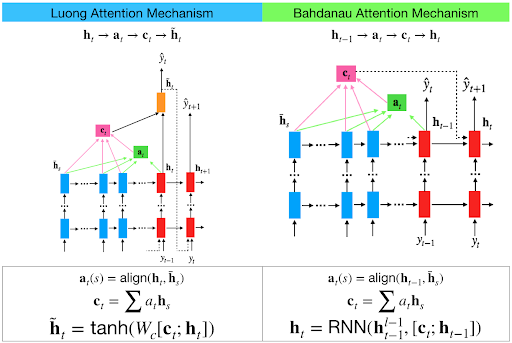

In [340]:
from IPython.display import Image
Image("https://i.stack.imgur.com/yqJpG.png")

In [341]:
user_len = df_sample["User"].nunique()
book_len = df_sample["Book"].nunique()
embed_dim = 64
mlp_dim = 64

user_input = keras.Input(
    shape=(None,), name="user"
) 
book_input = keras.Input(
    shape=(None,), name="book"
)

user_embeddings = layers.Embedding(user_len, embed_dim)(user_input)
book_embeddings = layers.Embedding(book_len, embed_dim)(book_input)

# CNN layer.
cnn_layer = tf.keras.layers.Conv1D(
    filters=100,
    kernel_size=4,
    # Use 'same' padding so outputs have the same shape as inputs.
    padding='same')

# Query encoding of shape [batch_size, Tq, filters].
query_seq_encoding = cnn_layer(user_embeddings)
# Value encoding of shape [batch_size, Tv, filters].
value_seq_encoding = cnn_layer(book_embeddings)

# Query-value attention of shape [batch_size, Tq, filters].
query_value_attention_seq = tf.keras.layers.Attention()(
    [query_seq_encoding, value_seq_encoding])

# Reduce over the sequence axis to produce encodings of shape
# [batch_size, filters].
query_encoding = tf.keras.layers.GlobalAveragePooling1D()(
    query_seq_encoding)
query_value_attention = tf.keras.layers.GlobalAveragePooling1D()(
    query_value_attention_seq)

# Concatenate query and document encodings to produce a DNN input layer.
x = tf.keras.layers.Concatenate()(
    [query_encoding, query_value_attention])

out = layers.Dense(1, name="rating")(x)

model = keras.Model(
    inputs=[user_input, book_input],
    outputs=[out],
)
model.summary()

Model: "model_50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 user (InputLayer)              [(None, None)]       0           []                               
                                                                                                  
 book (InputLayer)              [(None, None)]       0           []                               
                                                                                                  
 embedding_108 (Embedding)      (None, None, 64)     606464      ['user[0][0]']                   
                                                                                                  
 embedding_109 (Embedding)      (None, None, 64)     137792      ['book[0][0]']                   
                                                                                           

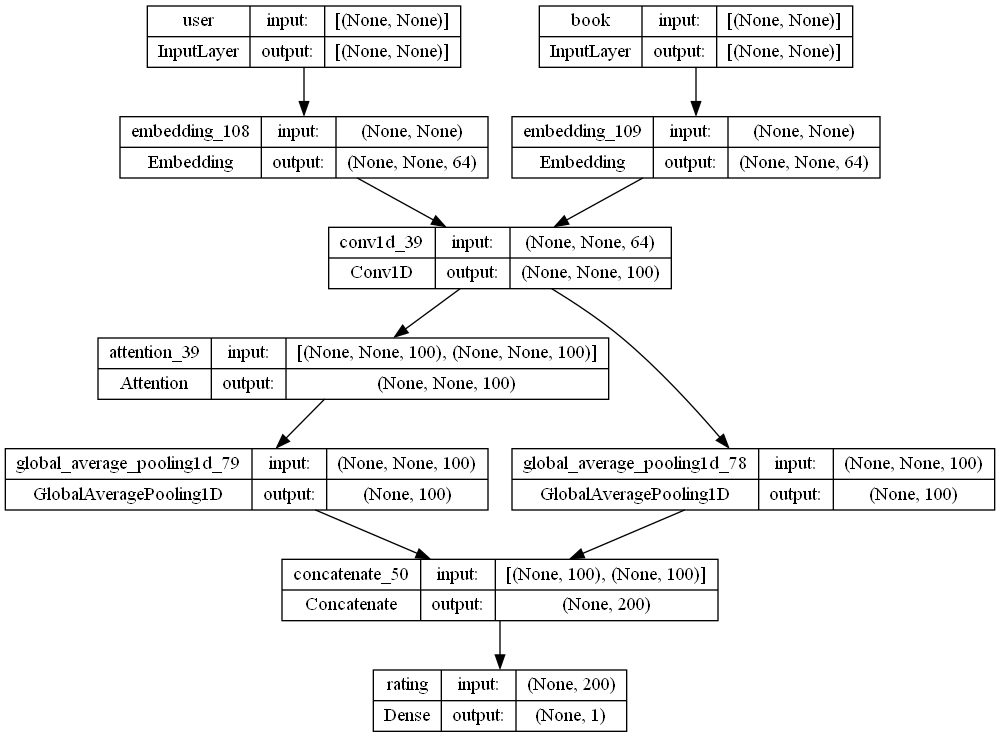

In [342]:
keras.utils.plot_model(model, "model.png", show_shapes=True)

In [343]:
model.compile(
    optimizer = keras.optimizers.Adam(1e-3),
    loss = keras.losses.MeanSquaredError(),
    metrics = [keras.metrics.RootMeanSquaredError(), keras.metrics.MeanAbsoluteError()]
)

model.fit(
    {"user": train_df['User'].values.reshape(-1,1), "book": train_df['Book'].values.reshape(-1,1)},
    {"rating":train_df['Book-Rating'].values},
    epochs=10,
    batch_size=128,
)

Epoch 1/10
1327/1327 [==============================] - 8s 5ms/step - loss: 3.7299 - root_mean_squared_error: 1.9313 - mean_absolute_error: 1.3469
Epoch 2/10
1327/1327 [==============================] - 7s 5ms/step - loss: 1.8751 - root_mean_squared_error: 1.3693 - mean_absolute_error: 1.0191
Epoch 3/10
1327/1327 [==============================] - 7s 5ms/step - loss: 1.8267 - root_mean_squared_error: 1.3515 - mean_absolute_error: 1.0005
Epoch 4/10
1327/1327 [==============================] - 7s 5ms/step - loss: 1.8075 - root_mean_squared_error: 1.3444 - mean_absolute_error: 0.9933
Epoch 5/10
1327/1327 [==============================] - 7s 5ms/step - loss: 1.7957 - root_mean_squared_error: 1.3400 - mean_absolute_error: 0.9890
Epoch 6/10
1327/1327 [==============================] - 7s 5ms/step - loss: 1.7860 - root_mean_squared_error: 1.3364 - mean_absolute_error: 0.9854
Epoch 7/10
1327/1327 [==============================] - 7s 5ms/step - loss: 1.7776 - root_mean_squared_error: 1.3333 -

In [344]:
model.evaluate({"user": test_df['User'].values.reshape(-1,1), "book": test_df['Book'].values.reshape(-1,1)},
               {"rating":test_df['Book-Rating'].values})

590/590 [==============================] - 1s 898us/step - loss: 1.9508 - root_mean_squared_error: 1.3967 - mean_absolute_error: 1.0277


[1.9507620334625244, 1.3966968059539795, 1.027660846710205]

In [345]:
model.evaluate({"user": cold_test_df['User'].values.reshape(-1,1), "book": cold_test_df['Book'].values.reshape(-1,1)},
               {"rating":cold_test_df['Book-Rating'].values})

22/22 [==============================] - 0s 1ms/step - loss: 3.1259 - root_mean_squared_error: 1.7680 - mean_absolute_error: 1.3427


[3.1258671283721924, 1.7680121660232544, 1.342673659324646]

**The model using attetion performs about the same with the previous recurrent models but it is cheaper computational and faster to train**

In [346]:
recommend_book_dl(df_sample, model, 76352, 5)

47/47 [==============================] - 0s 848us/step
The list of the Recommended Books 

1: Book Title: Griffin &amp; Sabine: An Extraordinary Correspondence - Author: Nick Bantock - Predicted Rating: 7.0357184410095215
2: Book Title: Harry Potter and the Prisoner of Azkaban (Book 3) - Author: J. K. Rowling - Predicted Rating: 7.029537200927734
3: Book Title: Harry Potter and the Goblet of Fire (Book 4) - Author: J. K. Rowling - Predicted Rating: 6.985368728637695
4: Book Title: Harry Potter and the Sorcerer's Stone (Book 1) - Author: J. K. Rowling - Predicted Rating: 6.8988447189331055
5: Book Title: Sabine's Notebook: In Which the Extraordinary Correspondence of Griffin &amp; Sabine Continues - Author: Nick Bantock - Predicted Rating: 6.87117338180542


## Better Hypertuning

After some trial and error, we found out that if we use adamax insted of adam as optimizer, the training is performed much faster with identical performance. Adamax, a variant of Adam based on the infinity norm, is a first-order gradient-based optimization method. We also found out that if we use 16 embedding dimension we get identical results compared to 64. Furthermore we used 50 filters on cnn layer instead of 100, thus reducing the models parameters from 757,207 to 189,415. We can now apply a bigger batch size, as the model's parameters have dropped significantly, such as 1024.

In [347]:
user_len = df_sample["User"].nunique()
book_len = df_sample["Book"].nunique()
embed_dim = 16

user_input = keras.Input(
    shape=(None,), name="user"
) 
book_input = keras.Input(
    shape=(None,), name="book"
)

user_embeddings = layers.Embedding(user_len, embed_dim)(user_input)
book_embeddings = layers.Embedding(book_len, embed_dim)(book_input)

# CNN layer.
cnn_layer = tf.keras.layers.Conv1D(
    filters=50,
    kernel_size=4,
    # Use 'same' padding so outputs have the same shape as inputs.
    padding='same')

# Query encoding of shape [batch_size, Tq, filters].
query_seq_encoding = cnn_layer(user_embeddings)
# Value encoding of shape [batch_size, Tv, filters].
value_seq_encoding = cnn_layer(book_embeddings)

# Query-value attention of shape [batch_size, Tq, filters].
query_value_attention_seq = tf.keras.layers.Attention()(
    [query_seq_encoding, value_seq_encoding])

# Reduce over the sequence axis to produce encodings of shape
# [batch_size, filters].
query_encoding = tf.keras.layers.GlobalAveragePooling1D()(
    query_seq_encoding)
query_value_attention = tf.keras.layers.GlobalAveragePooling1D()(
    query_value_attention_seq)

# Concatenate query and document encodings to produce a DNN input layer.
x = tf.keras.layers.Concatenate()(
    [query_encoding, query_value_attention])

out = layers.Dense(1, name="rating")(x)

model = keras.Model(
    inputs=[user_input, book_input],
    outputs=[out],
)
model.summary()

Model: "model_51"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 user (InputLayer)              [(None, None)]       0           []                               
                                                                                                  
 book (InputLayer)              [(None, None)]       0           []                               
                                                                                                  
 embedding_110 (Embedding)      (None, None, 16)     151616      ['user[0][0]']                   
                                                                                                  
 embedding_111 (Embedding)      (None, None, 16)     34448       ['book[0][0]']                   
                                                                                           

In [348]:
model.compile(
    optimizer = keras.optimizers.Adamax(1e-3),
    loss = keras.losses.MeanSquaredError(),
    metrics = [keras.metrics.RootMeanSquaredError(), keras.metrics.MeanAbsoluteError()]
)

model.fit(
    {"user": train_df['User'].values.reshape(-1,1), "book": train_df['Book'].values.reshape(-1,1)},
    {"rating":train_df['Book-Rating'].values},
    epochs=20,
    batch_size=1024,
)

Epoch 1/20
166/166 [==============================] - 1s 3ms/step - loss: 25.7288 - root_mean_squared_error: 5.0724 - mean_absolute_error: 4.6669
Epoch 2/20
166/166 [==============================] - 0s 3ms/step - loss: 2.9913 - root_mean_squared_error: 1.7295 - mean_absolute_error: 1.2515
Epoch 3/20
166/166 [==============================] - 0s 3ms/step - loss: 2.2698 - root_mean_squared_error: 1.5066 - mean_absolute_error: 1.1805
Epoch 4/20
166/166 [==============================] - 0s 3ms/step - loss: 2.1190 - root_mean_squared_error: 1.4557 - mean_absolute_error: 1.1370
Epoch 5/20
166/166 [==============================] - 0s 3ms/step - loss: 2.0226 - root_mean_squared_error: 1.4222 - mean_absolute_error: 1.1011
Epoch 6/20
166/166 [==============================] - 0s 3ms/step - loss: 1.9553 - root_mean_squared_error: 1.3983 - mean_absolute_error: 1.0729
Epoch 7/20
166/166 [==============================] - 0s 3ms/step - loss: 1.9053 - root_mean_squared_error: 1.3803 - mean_absolut

In [349]:
model.evaluate({"user": test_df['User'].values.reshape(-1,1), "book": test_df['Book'].values.reshape(-1,1)},
               {"rating":test_df['Book-Rating'].values})

590/590 [==============================] - 1s 846us/step - loss: 1.9616 - root_mean_squared_error: 1.4006 - mean_absolute_error: 1.0255


[1.9615782499313354, 1.4005635976791382, 1.0255491733551025]

In [350]:
model.evaluate({"user": cold_test_df['User'].values.reshape(-1,1), "book": cold_test_df['Book'].values.reshape(-1,1)},
               {"rating":cold_test_df['Book-Rating'].values})

22/22 [==============================] - 0s 1000us/step - loss: 3.0380 - root_mean_squared_error: 1.7430 - mean_absolute_error: 1.3792


[3.03796124458313, 1.742974877357483, 1.3791933059692383]

**We can observe that the model was trained much faster than the previous DL models and yields identical results. Therefore, this model would be more likely to be deployed**